In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from operator import add
import os
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib.ticker import FixedLocator
import matplotlib.font_manager


sns.set_style("ticks")
font = {
    "font.family": "Roboto",
    "font.size": 12,
}
sns.set_style(font)
paper_rc = {
    "lines.linewidth": 3,
    "lines.markersize": 10,
}
sns.set_context("paper", font_scale=1.8, rc=paper_rc)
current_palette = sns.color_palette()
cmp = sns.color_palette("tab10")

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            "%.1f" % height,
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 4),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
            size=14,
        )
    
def autolabel_h(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        width = rect.get_width()
        ax.annotate(
            "%.2f" % width,
            xy=(width, rect.get_y() + rect.get_height() / 2),
            xytext=(18, -1),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="center",
            size=13,
        )

SAVEPATH = './figs'
os.makedirs(SAVEPATH, exist_ok=True)

# Motiv: deep GNNs better

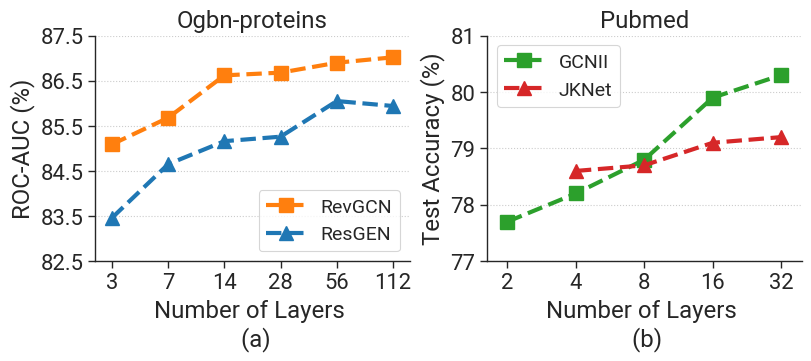

In [2]:

import numpy as np
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42	
cmp = sns.color_palette("tab10")

grid_params=dict(width_ratios=[1, 1])
fig, axs = plt.subplots(ncols=2, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(8, 3.5))

### Fig 1 ###
resgen = np.array([83.46, 84.65, 85.16, 85.26, 86.05, 85.94])
revgcn = np.array([85.09, 85.68, 86.62, 86.68, 86.9, 87.02])
x = np.array([1, 2, 3, 4, 5, 6])

p2, = axs[0].plot(x, revgcn, label='RevGCN',marker='s',color=cmp[1],linestyle='--',linewidth=3,ms=10)
p1, = axs[0].plot(x, resgen, label='ResGEN',marker='^',color=cmp[0],linestyle='--',linewidth=3,ms=10)


axs[0].set_xlabel(f"Number of Layers \n (a)")
axs[0].set_ylabel(f"ROC-AUC (%)")
axs[0].set_ylim(82.5, 87.5)
axs[0].set_yticks(np.arange(82.5, 87.6, 1))
axs[0].set_xlim(0.7,6.3)
axs[0].set_xticks(x)
axs[0].set_xticklabels(['3', '7', '14', '28', '56', '112'])
axs[0].grid(axis="y", linestyle=":")
axs[0].set_title('Ogbn-proteins')
axs[0].legend(
            # loc='upper center', 
            #   bbox_to_anchor=(0.52,1.13), 
              fancybox=True, 
              fontsize=14,
              shadow=False)




### Fig 2 ###
jknet = np.array([78.6, 78.7, 79.1, 79.2])
gcnii = np.array([77.7, 78.2, 78.8, 79.9, 80.3])
x1 = np.array([2, 3, 4, 5])
x2 = np.array([1, 2, 3, 4, 5])

p2, = axs[1].plot(x2, gcnii, label='GCNII',marker='s',color=cmp[2],linestyle='--',linewidth=3,ms=10)
p1, = axs[1].plot(x1, jknet, label='JKNet',marker='^',color=cmp[3],linestyle='--',linewidth=3,ms=10)


axs[1].set_xlabel(f"Number of Layers \n (b)")
axs[1].set_ylabel(f"Test Accuracy (%)")
axs[1].set_ylim(77, 81)
# axs[1].set_yticks(np.arange(8, 87.6, 1))
axs[1].set_xlim(0.7,5.3)
axs[1].set_xticks(x2)
axs[1].set_xticklabels(['2', '4', '8', '16', '32'])
axs[1].grid(axis="y", linestyle=":")
axs[1].set_title('Pubmed')
axs[1].legend(
              loc=0, 
              # ncol=2,
            #   bbox_to_anchor=(0.52,1.13), 
              fancybox=True, 
              fontsize=14,
              shadow=False)


sns.despine()

save=True
if save:
    fig.savefig(f"{SAVEPATH}/moti-deep-gnns.pdf", bbox_inches="tight")

# Motiv: LM4Graph time profile

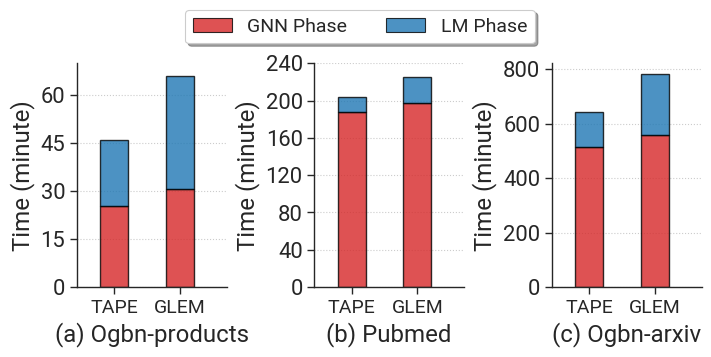

In [8]:
cmp = sns.color_palette("tab10")
grid_params=dict(width_ratios=[1, 1, 1])
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(7, 3))

#### #### #### #### #### #### #### #### Fig 1 ####  #### #### #### #### #### #### ####
labels = ['TAPE', 'GLEM']
# products, revgat
lm_part_products = np.array([1242.23, 2118.927]) / 60
gnn_part_products = np.array([1519.35, 1843.413]) / 60

width = 0.3
x_ticks = np.array([0, 0.7])
y_ticks = np.arange(0, 70, 15)
x = np.arange(0, 2)
A = ax1.bar(x_ticks, gnn_part_products, width=width, label='gnn', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
p1 = ax1.bar(x_ticks, lm_part_products, width=width, bottom=gnn_part_products, label='lm', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])

ax1.set_xticks(x_ticks)
ax1.set_xticklabels(labels, fontsize=14)
ax1.set_xlim(-0.4, 1.2)
# ax1.set_yscale("log", base=10)
ax1.set_ylabel('Time (minute)')
ax1.set_ylim(0, 70)
ax1.set_yticks(y_ticks)
# ax1.set_title('GraphSAGE')
ax1.grid(axis="y", linestyle=":")
ax1.set_xlabel('(a) Ogbn-products')

#### #### #### #### #### #### #### #### Fig 2 ####  #### #### #### #### #### #### ####
# pubmed, revgat
lm_part_pubmed = np.array([957.887, 1695.054]) / 60
gnn_part_pubmed = np.array([11266.503, 11855.476]) / 60

width = 0.3
x_ticks = np.array([0, 0.7])
y_ticks = np.arange(0, 241, 40)
x = np.arange(0, 2)
A = ax2.bar(x_ticks, gnn_part_pubmed, width=width, label='gnn', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
p1 = ax2.bar(x_ticks, lm_part_pubmed, width=width, bottom=gnn_part_pubmed, label='lm', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])

ax2.set_xticks(x_ticks)
ax2.set_xticklabels(labels, fontsize=14)
ax2.set_xlim(-0.4, 1.2)
# ax2.set_yscale("log", base=10)
ax2.set_ylabel('Time (minute)')
ax2.set_ylim(0, 240)
ax2.set_yticks(y_ticks)
# ax2.set_title('GraphSAGE')
ax2.grid(axis="y", linestyle=":")
ax2.set_xlabel('(b) Pubmed')

#### #### #### #### #### #### #### #### Fig 3 ####  #### #### #### #### #### #### ####
# revgat
lm_part_arxiv = np.array([7770.7, 13520.1]) / 60
gnn_part_arxiv = np.array([30771.6, 33404.14]) / 60

width = 0.3
x_ticks = np.array([0, 0.7])
# y_ticks = np.arange(0, 241, 40)
x = np.arange(0, 2)
ax3.bar(x_ticks, gnn_part_arxiv, width=width, label='gnn', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
ax3.bar(x_ticks, lm_part_arxiv, width=width, bottom=gnn_part_arxiv, label='lm', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])

ax3.set_xticks(x_ticks)
ax3.set_xticklabels(labels, fontsize=14)
ax3.set_xlim(-0.4, 1.2)
# ax2.set_yscale("log", base=10)
ax3.set_ylabel('Time (minute)')
# ax3.set_ylim(0, 240)
# ax3.set_yticks(y_ticks)
# ax2.set_title('GraphSAGE')
ax3.grid(axis="y", linestyle=":")
ax3.set_xlabel('(c) Ogbn-arxiv')

A = mpatches.Patch(facecolor=cmp[3], alpha=0.8, edgecolor="black", label="GNN Phase")
# B = mpatches.Patch(facecolor=cmp[1], alpha=0.8, edgecolor="black", label="FlashAttn FW")
C = mpatches.Patch(facecolor=cmp[0], alpha=0.8, edgecolor="black", label="LM Phase")

legend = fig.legend(
    loc=1,
    handles=[A, C],
    bbox_to_anchor=(0.77, 1.17),
    ncol=3,
    frameon=True,
    fancybox=True,
    shadow=True,
    fontsize=14,
)

sns.despine()
save=True
if save:
    fig.savefig(f"{SAVEPATH}/moti-lm4graph-time.pdf", bbox_inches="tight")

# Motiv: LM4Graph memory profile

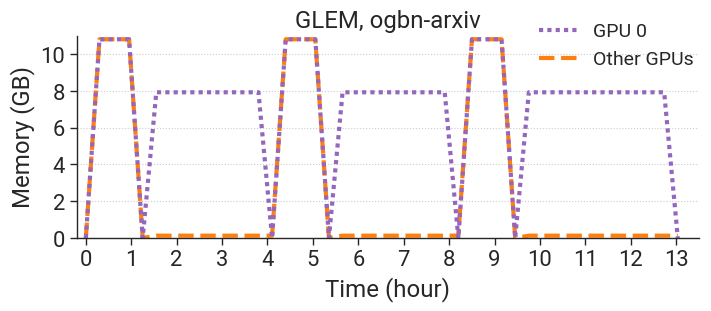

In [11]:
cmp = sns.color_palette("tab10")
grid_params=dict(width_ratios=[1])
fig, ax4 = plt.subplots(ncols=1, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(7, 3))

warmup = 0.3
x_glem = np.array([
    0, warmup, 4506.7/3600-warmup, 4506.7/3600, 
    warmup+4506.7/3600, (10257.2+4506.7)/3600-warmup, (10257.2+4506.7)/3600,
    warmup+(10257.2+4506.7)/3600, (10257.2+4506.7*2)/3600-warmup, (10257.2+4506.7*2)/3600,
    warmup+(10257.2+4506.7*2)/3600, (10257.2*2+4506.7*2)/3600-warmup, (10257.2*2+4506.7*2)/3600,
    warmup+(10257.2*2+4506.7*2)/3600, (10257.2*2+4506.7*3)/3600-warmup, (10257.2*2+4506.7*3)/3600,
    warmup+(10257.2*2+4506.7*3)/3600, 46924.24/3600-warmup, 46924.24/3600,
    ])
memory_glem = np.array([
    0, 11064, 11064, 0, 
    8112, 8112, 0,
    11064, 11064, 0,
    8112, 8112, 0,
    11064, 11064, 0,
    8112, 8112, 0,
    ]) / 1024

memory_glem_other_gpu = np.array([
    0, 11064, 11064, 0, 
    130, 130, 130,
    11064, 11064, 0,
    130, 130, 130,
    11064, 11064, 0,
    130, 130, 130,
    ]) / 1024


p1, = ax4.plot(x_glem, memory_glem_other_gpu, label='Other GPUs',
                #   marker='s',
                  color=cmp[1],
                  linestyle='--',
                  linewidth=3,
                  ms=6,
                  alpha=1,
                  )
p2, = ax4.plot(x_glem, memory_glem, label='GPU 0',
                #   marker='o',
                  color=cmp[4],
                  linestyle=(0, (1, 1)),
                  linewidth=3,
                  ms=6,
                  alpha=1,
                  )




ax4.set_xlabel(f"Time (hour)")
ax4.set_xlim(-0.2,13.5)
ax4.set_xticks(np.arange(0, 14, 1))
# axs[0].set_xticklabels(['3', '7', '14', '28', '56', '112'])
ax4.set_ylabel(f"Memory (GB)")
ax4.set_ylim(0, 11)
ax4.set_yticks(np.arange(0, 11, 2))

ax4.grid(axis="y", linestyle=":")
ax4.set_title('GLEM, ogbn-arxiv')
ax4.legend(
            loc=1, 
            handles=[p2, p1],
            bbox_to_anchor=(1.02, 1.15),
            ncol=1,
            frameon=False,
            fancybox=False,
            shadow=False,
            fontsize=14,
            )
sns.despine()


save=True
if save:
    fig.savefig(f"{SAVEPATH}/moti-lm4graph-memory.pdf", bbox_inches="tight")

# Motiv: Current methods block practical use

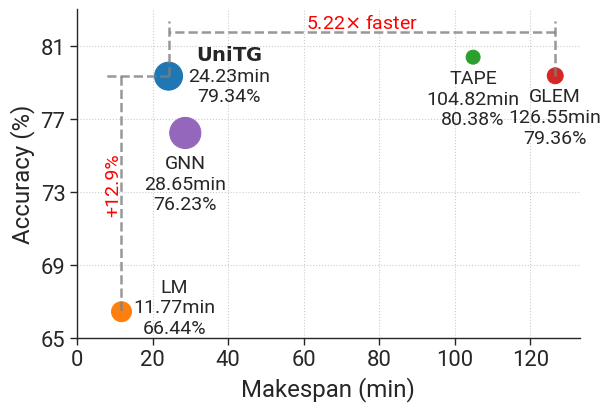

In [197]:
cmp = sns.color_palette("tab10")
grid_params=dict(width_ratios=[1])
fig, ax4 = plt.subplots(ncols=1, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(6, 4))

warmup = 0.3
# GNN LM TAPE GLEM UniTG
methods = ["GNN", "LM", "TAPE", "GLEM", "UniTG"]
x_time = np.array([
    1719.1, 706.309, 6289.28, 7593.2, 1453.84
    ]) / 60
y_acc = np.array([
    76.23, 66.44, 80.38, 79.36, 79.34
    ]) 
gpu_util = np.array([80, 40, 26, 30, 67])

colors = [cmp[4], cmp[1], cmp[2], cmp[3], cmp[0]]
# 归一化 y_acc 到 [0, 1]
y_min, y_max = gpu_util.min(), gpu_util.max()
y_norm = (gpu_util - y_min) / (y_max - y_min)

# 映射到点大小范围 [50, 500]
sizes = 100 + y_norm * (500 - 100)

p1 = ax4.scatter(x_time, y_acc,
                #   marker='s',
                  color=colors,
                  s=sizes, 
                  marker='o'
                  )

ax4.text(x_time[0], y_acc[0]-4.2, f"{methods[0]}\n{x_time[0]:.2f}min\n{y_acc[0]:.2f}%", fontsize=14, ha='center')
ax4.text(x_time[1]+14, y_acc[1]-1.2, f"{methods[1]}\n{x_time[1]:.2f}min\n{y_acc[1]:.2f}%", fontsize=14, ha='center')
ax4.text(x_time[4]+16, y_acc[4]-1.4, f"$\\bf{{{methods[4]}}}$\n{x_time[4]:.2f}min\n{y_acc[4]:.2f}%", fontsize=14, ha='center')
for i, (x, y, method, acc) in enumerate(zip(x_time[2:4], y_acc[2:4], methods[2:4], y_acc[2:4])):
    ax4.text(x, y-3.7, f"{method}\n{x:.2f}min\n{acc:.2f}%", fontsize=14, ha='center')

# ------------------ annotate throughput improve --------------------
ax4.plot([x_time[4], x_time[4]], 
    [y_acc[4], y_acc[4]+3], 
    color=cmp[-3], linestyle="--", linewidth=1.8, alpha=0.8)

ax4.plot([x_time[3], x_time[3]], 
    [y_acc[3], y_acc[3]+3], 
    color=cmp[-3], linestyle="--", linewidth=1.8, alpha=0.8)

ax4.plot([x_time[3], x_time[4]], 
    [y_acc[3]+2.4, y_acc[3]+2.4], 
    color=cmp[-3], linestyle="--", linewidth=1.8, alpha=0.8)
ax4.text((x_time[4]+x_time[3])/2, y_acc[3]+2.6, f"{x_time[3]/x_time[4]:.2f}"+r"$\times$"+" faster", fontsize=14, ha='center', color='red')

# ------------------ annotate accuracy improve --------------------
ax4.plot([x_time[4], x_time[4]-17], 
    [y_acc[4], y_acc[4]], 
    color=cmp[-3], linestyle="--", linewidth=1.8, alpha=0.8)

ax4.plot([x_time[1], x_time[1]], 
    [y_acc[4], y_acc[1]], 
    color=cmp[-3], linestyle="--", linewidth=1.8, alpha=0.8)
ax4.text(x_time[1]-2.2, (y_acc[1]+y_acc[4])/2-1, f"+{12.9:.1f}%", fontsize=14, ha='center', rotation=90, color='red')



ax4.set_xlabel(f"Makespan (min)")
ax4.set_xlim(0, 133)
ax4.set_xticks(np.arange(0, 133, 20))
# axs[0].set_xticklabels(['3', '7', '14', '28', '56', '112'])
ax4.set_ylabel(f"Accuracy (%)")
ax4.set_ylim(65, 83)
ax4.set_yticks(np.arange(65, 83, 4))

ax4.grid(axis="y", linestyle=":")
ax4.grid(axis="x", linestyle=":")
# ax4.set_title('GLEM, ogbn-arxiv')
# ax4.legend(
            # loc=1, 
            # handles=[p2, p1],
            # bbox_to_anchor=(1.02, 1.15),
            # ncol=1,
            # frameon=False,
            # fancybox=False,
            # shadow=False,
            # fontsize=14,
            # )
sns.despine()


save=True
if save:
    fig.savefig(f"{SAVEPATH}/moti-cur-methods.pdf", bbox_inches="tight")

In [9]:
x_time

array([ 28.65166667,  11.77181667, 104.82133333, 126.55333333,
        24.23066667])

# Motiv: 3 in 1

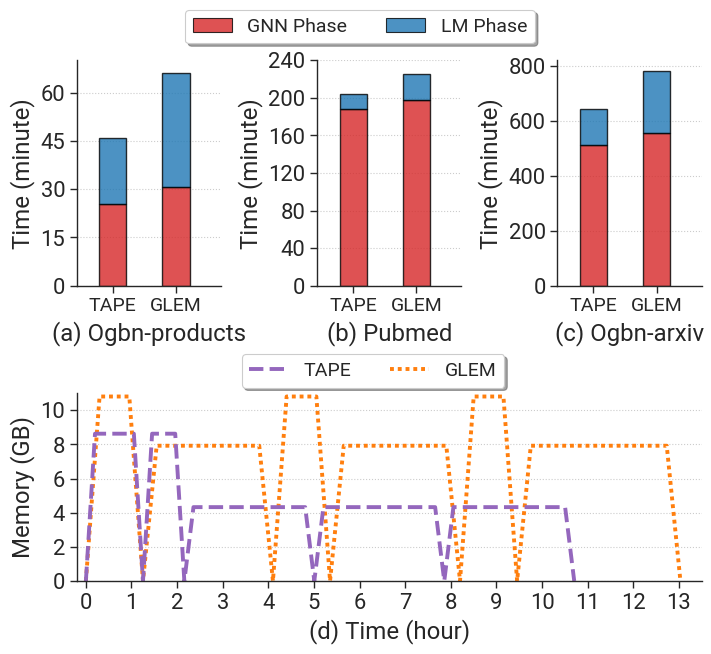

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec


# fig, axs = plt.subplots(ncols=2, nrows=2, constrained_layout=True, figsize=(8, 7))
fig = plt.figure(figsize=(7, 6), constrained_layout=True)
gs = gridspec.GridSpec(2, 3, figure=fig, height_ratios=[1.2, 1])  # 定义 2x2 网格

# 创建上排两个子图
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# 合并下排3个子图为一个子图
ax4 = fig.add_subplot(gs[1, :])  # 占据整行

#### #### #### #### #### #### #### #### Fig 1 ####  #### #### #### #### #### #### ####
# revgat
labels = ['TAPE', 'GLEM']
# products:pubmed
lm_part_products = np.array([1242.23, 2118.927]) / 60
gnn_part_products = np.array([1519.35, 1843.413]) / 60

width = 0.3
x_ticks = np.array([0, 0.7])
y_ticks = np.arange(0, 70, 15)
x = np.arange(0, 2)
# Fig 1
A = ax1.bar(x_ticks, gnn_part_products, width=width, label='gnn', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
p1 = ax1.bar(x_ticks, lm_part_products, width=width, bottom=gnn_part_products, label='lm', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])

ax1.set_xticks(x_ticks)
ax1.set_xticklabels(labels, fontsize=14)
ax1.set_xlim(-0.4, 1.2)
# ax1.set_yscale("log", base=10)
ax1.set_ylabel('Time (minute)')
ax1.set_ylim(0, 70)
ax1.set_yticks(y_ticks)
# ax1.set_title('GraphSAGE')
ax1.grid(axis="y", linestyle=":")
ax1.set_xlabel('(a) Ogbn-products')

#### #### #### #### #### #### #### #### Fig 2 ####  #### #### #### #### #### #### ####
lm_part_pubmed = np.array([957.887, 1695.054]) / 60
gnn_part_pubmed = np.array([11266.503, 11855.476]) / 60

width = 0.3
x_ticks = np.array([0, 0.7])
y_ticks = np.arange(0, 241, 40)
x = np.arange(0, 2)
A = ax2.bar(x_ticks, gnn_part_pubmed, width=width, label='gnn', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
p1 = ax2.bar(x_ticks, lm_part_pubmed, width=width, bottom=gnn_part_pubmed, label='lm', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])

ax2.set_xticks(x_ticks)
ax2.set_xticklabels(labels, fontsize=14)
ax2.set_xlim(-0.4, 1.2)
# ax2.set_yscale("log", base=10)
ax2.set_ylabel('Time (minute)')
ax2.set_ylim(0, 240)
ax2.set_yticks(y_ticks)
# ax2.set_title('GraphSAGE')
ax2.grid(axis="y", linestyle=":")
ax2.set_xlabel('(b) Pubmed')

#### #### #### #### #### #### #### #### Fig 3 ####  #### #### #### #### #### #### ####

lm_part_arxiv = np.array([7770.7, 13520.1]) / 60
gnn_part_arxiv = np.array([30771.6, 33404.14]) / 60

width = 0.3
x_ticks = np.array([0, 0.7])
# y_ticks = np.arange(0, 241, 40)
x = np.arange(0, 2)
ax3.bar(x_ticks, gnn_part_arxiv, width=width, label='gnn', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
ax3.bar(x_ticks, lm_part_arxiv, width=width, bottom=gnn_part_arxiv, label='lm', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])

ax3.set_xticks(x_ticks)
ax3.set_xticklabels(labels, fontsize=14)
ax3.set_xlim(-0.4, 1.2)
# ax2.set_yscale("log", base=10)
ax3.set_ylabel('Time (minute)')
# ax3.set_ylim(0, 240)
# ax3.set_yticks(y_ticks)
# ax2.set_title('GraphSAGE')
ax3.grid(axis="y", linestyle=":")
ax3.set_xlabel('(c) Ogbn-arxiv')

A = mpatches.Patch(facecolor=cmp[3], alpha=0.8, edgecolor="black", label="GNN Phase")
# B = mpatches.Patch(facecolor=cmp[1], alpha=0.8, edgecolor="black", label="FlashAttn FW")
C = mpatches.Patch(facecolor=cmp[0], alpha=0.8, edgecolor="black", label="LM Phase")

legend = fig.legend(
    loc=1,
    handles=[A, C],
    bbox_to_anchor=(0.77, 1.08),
    ncol=3,
    frameon=True,
    fancybox=True,
    shadow=True,
    fontsize=14,
)

#### #### #### #### #### #### #### #### Fig 4 ####  #### #### #### #### #### #### ####
warmup = 0.2
x_tape = np.array([
    0, warmup, 4506.7/3600-warmup, 4506.7/3600, 
    warmup+4506.7/3600, 7770.7/3600-warmup, 7770.7/3600,
    warmup+7770.7/3600, (10257.2+7770.7)/3600-warmup, (10257.2+7770.7)/3600,
    warmup+(10257.2+7770.7)/3600, (10257.2*2+7770.7)/3600-warmup, (10257.2*2+7770.7)/3600,
    warmup+(10257.2*2+7770.7)/3600, (10257.2*3+7770.7)/3600-warmup, (10257.2*3+7770.7)/3600,
    ])
memory_tape = np.array([
    0, 8834, 8834, 0, 
    8834, 8834, 0,
    4430, 4430, 0,
    4430, 4430, 0,
    4430, 4430, 0,
    ]) / 1024

warmup = 0.3
x_glem = np.array([
    0, warmup, 4506.7/3600-warmup, 4506.7/3600, 
    warmup+4506.7/3600, (10257.2+4506.7)/3600-warmup, (10257.2+4506.7)/3600,
    warmup+(10257.2+4506.7)/3600, (10257.2+4506.7*2)/3600-warmup, (10257.2+4506.7*2)/3600,
    warmup+(10257.2+4506.7*2)/3600, (10257.2*2+4506.7*2)/3600-warmup, (10257.2*2+4506.7*2)/3600,
    warmup+(10257.2*2+4506.7*2)/3600, (10257.2*2+4506.7*3)/3600-warmup, (10257.2*2+4506.7*3)/3600,
    warmup+(10257.2*2+4506.7*3)/3600, 46924.24/3600-warmup, 46924.24/3600,
    ])
memory_glem = np.array([
    0, 11064, 11064, 0, 
    8112, 8112, 0,
    11064, 11064, 0,
    8112, 8112, 0,
    11064, 11064, 0,
    8112, 8112, 0,
    ]) / 1024


p2, = ax4.plot(x_glem, memory_glem, label='GLEM',
                #   marker='o',
                  color=cmp[1],
                  linestyle=(0, (1, 1)),
                  linewidth=2.8,
                  ms=6,
                  )
p1, = ax4.plot(x_tape, memory_tape, label='TAPE',
                #   marker='s',
                  color=cmp[4],
                  linestyle='--',
                  linewidth=2.8,
                  ms=6,
                  )



ax4.set_xlabel(f"(d) Time (hour)")
ax4.set_xlim(-0.2,13.5)
ax4.set_xticks(np.arange(0, 14, 1))
# axs[0].set_xticklabels(['3', '7', '14', '28', '56', '112'])
ax4.set_ylabel(f"Memory (GB)")
ax4.set_ylim(0, 11)
ax4.set_yticks(np.arange(0, 11, 2))

ax4.grid(axis="y", linestyle=":")
# axs[0].set_title('Ogbn-arxiv')
ax4.legend(
            loc=1, 
            handles=[p1, p2],
            bbox_to_anchor=(0.7, 1.26),
            ncol=3,
            frameon=True,
            fancybox=True,
            shadow=True,
            fontsize=14,
            )

sns.despine()


save=False
if save:
    fig.savefig(f"{SAVEPATH}/moti-lm4graph-time.pdf", bbox_inches="tight")

# Motiv: 3 in 2 v2

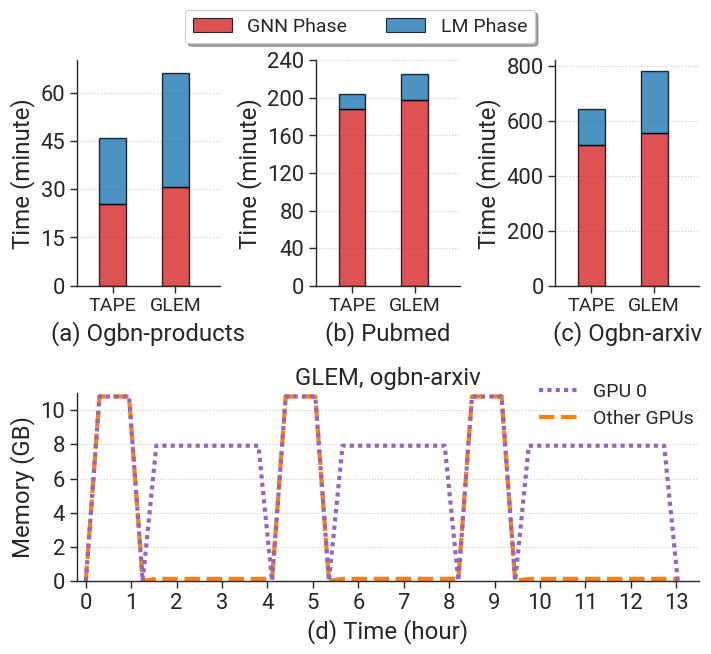

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec


# fig, axs = plt.subplots(ncols=2, nrows=2, constrained_layout=True, figsize=(8, 7))
fig = plt.figure(figsize=(7, 6), constrained_layout=True)
gs = gridspec.GridSpec(2, 3, figure=fig, height_ratios=[1.2, 1], hspace=0.07)  # 定义 2x2 网格

# 创建上排两个子图
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# 合并下排3个子图为一个子图
ax4 = fig.add_subplot(gs[1, :])  # 占据整行

#### #### #### #### #### #### #### #### Fig 1 ####  #### #### #### #### #### #### ####
labels = ['TAPE', 'GLEM']
# products, revgat
lm_part_products = np.array([1242.23, 2118.927]) / 60
gnn_part_products = np.array([1519.35, 1843.413]) / 60

width = 0.3
x_ticks = np.array([0, 0.7])
y_ticks = np.arange(0, 70, 15)
x = np.arange(0, 2)
A = ax1.bar(x_ticks, gnn_part_products, width=width, label='gnn', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
p1 = ax1.bar(x_ticks, lm_part_products, width=width, bottom=gnn_part_products, label='lm', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])

ax1.set_xticks(x_ticks)
ax1.set_xticklabels(labels, fontsize=14)
ax1.set_xlim(-0.4, 1.2)
# ax1.set_yscale("log", base=10)
ax1.set_ylabel('Time (minute)')
ax1.set_ylim(0, 70)
ax1.set_yticks(y_ticks)
# ax1.set_title('GraphSAGE')
ax1.grid(axis="y", linestyle=":")
ax1.set_xlabel('(a) Ogbn-products')

#### #### #### #### #### #### #### #### Fig 2 ####  #### #### #### #### #### #### ####
# pubmed, revgat
lm_part_pubmed = np.array([957.887, 1695.054]) / 60
gnn_part_pubmed = np.array([11266.503, 11855.476]) / 60

width = 0.3
x_ticks = np.array([0, 0.7])
y_ticks = np.arange(0, 241, 40)
x = np.arange(0, 2)
A = ax2.bar(x_ticks, gnn_part_pubmed, width=width, label='gnn', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
p1 = ax2.bar(x_ticks, lm_part_pubmed, width=width, bottom=gnn_part_pubmed, label='lm', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])

ax2.set_xticks(x_ticks)
ax2.set_xticklabels(labels, fontsize=14)
ax2.set_xlim(-0.4, 1.2)
# ax2.set_yscale("log", base=10)
ax2.set_ylabel('Time (minute)')
ax2.set_ylim(0, 240)
ax2.set_yticks(y_ticks)
# ax2.set_title('GraphSAGE')
ax2.grid(axis="y", linestyle=":")
ax2.set_xlabel('(b) Pubmed')

#### #### #### #### #### #### #### #### Fig 3 ####  #### #### #### #### #### #### ####
# revgat
lm_part_arxiv = np.array([7770.7, 13520.1]) / 60
gnn_part_arxiv = np.array([30771.6, 33404.14]) / 60

width = 0.3
x_ticks = np.array([0, 0.7])
# y_ticks = np.arange(0, 241, 40)
x = np.arange(0, 2)
ax3.bar(x_ticks, gnn_part_arxiv, width=width, label='gnn', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
ax3.bar(x_ticks, lm_part_arxiv, width=width, bottom=gnn_part_arxiv, label='lm', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])

ax3.set_xticks(x_ticks)
ax3.set_xticklabels(labels, fontsize=14)
ax3.set_xlim(-0.4, 1.2)
# ax2.set_yscale("log", base=10)
ax3.set_ylabel('Time (minute)')
# ax3.set_ylim(0, 240)
# ax3.set_yticks(y_ticks)
# ax2.set_title('GraphSAGE')
ax3.grid(axis="y", linestyle=":")
ax3.set_xlabel('(c) Ogbn-arxiv')

A = mpatches.Patch(facecolor=cmp[3], alpha=0.8, edgecolor="black", label="GNN Phase")
# B = mpatches.Patch(facecolor=cmp[1], alpha=0.8, edgecolor="black", label="FlashAttn FW")
C = mpatches.Patch(facecolor=cmp[0], alpha=0.8, edgecolor="black", label="LM Phase")

legend = fig.legend(
    loc=1,
    handles=[A, C],
    bbox_to_anchor=(0.77, 1.08),
    ncol=3,
    frameon=True,
    fancybox=True,
    shadow=True,
    fontsize=14,
)

#### #### #### #### #### #### #### #### Fig 4 ####  #### #### #### #### #### #### ####
# warmup = 0.2
# x_tape = np.array([
#     0, warmup, 4506.7/3600-warmup, 4506.7/3600, 
#     warmup+4506.7/3600, 7770.7/3600-warmup, 7770.7/3600,
#     warmup+7770.7/3600, (10257.2+7770.7)/3600-warmup, (10257.2+7770.7)/3600,
#     warmup+(10257.2+7770.7)/3600, (10257.2*2+7770.7)/3600-warmup, (10257.2*2+7770.7)/3600,
#     warmup+(10257.2*2+7770.7)/3600, (10257.2*3+7770.7)/3600-warmup, (10257.2*3+7770.7)/3600,
#     ])
# memory_tape = np.array([
#     0, 8834, 8834, 0, 
#     8834, 8834, 0,
#     4430, 4430, 0,
#     4430, 4430, 0,
#     4430, 4430, 0,
#     ]) / 1024

warmup = 0.3
x_glem = np.array([
    0, warmup, 4506.7/3600-warmup, 4506.7/3600, 
    warmup+4506.7/3600, (10257.2+4506.7)/3600-warmup, (10257.2+4506.7)/3600,
    warmup+(10257.2+4506.7)/3600, (10257.2+4506.7*2)/3600-warmup, (10257.2+4506.7*2)/3600,
    warmup+(10257.2+4506.7*2)/3600, (10257.2*2+4506.7*2)/3600-warmup, (10257.2*2+4506.7*2)/3600,
    warmup+(10257.2*2+4506.7*2)/3600, (10257.2*2+4506.7*3)/3600-warmup, (10257.2*2+4506.7*3)/3600,
    warmup+(10257.2*2+4506.7*3)/3600, 46924.24/3600-warmup, 46924.24/3600,
    ])
memory_glem = np.array([
    0, 11064, 11064, 0, 
    8112, 8112, 0,
    11064, 11064, 0,
    8112, 8112, 0,
    11064, 11064, 0,
    8112, 8112, 0,
    ]) / 1024

memory_glem_other_gpu = np.array([
    0, 11064, 11064, 0, 
    130, 130, 130,
    11064, 11064, 0,
    130, 130, 130,
    11064, 11064, 0,
    130, 130, 130,
    ]) / 1024


p1, = ax4.plot(x_glem, memory_glem_other_gpu, label='Other GPUs',
                #   marker='s',
                  color=cmp[1],
                  linestyle='--',
                  linewidth=3,
                  ms=6,
                  alpha=1,
                  )
p2, = ax4.plot(x_glem, memory_glem, label='GPU 0',
                #   marker='o',
                  color=cmp[4],
                  linestyle=(0, (1, 1)),
                  linewidth=3,
                  ms=6,
                  alpha=1,
                  )




ax4.set_xlabel(f"(d) Time (hour)")
ax4.set_xlim(-0.2,13.5)
ax4.set_xticks(np.arange(0, 14, 1))
# axs[0].set_xticklabels(['3', '7', '14', '28', '56', '112'])
ax4.set_ylabel(f"Memory (GB)")
ax4.set_ylim(0, 11)
ax4.set_yticks(np.arange(0, 11, 2))

ax4.grid(axis="y", linestyle=":")
ax4.set_title('GLEM, ogbn-arxiv')
ax4.legend(
            loc=1, 
            handles=[p2, p1],
            bbox_to_anchor=(1.02, 1.15),
            ncol=1,
            frameon=False,
            fancybox=False,
            shadow=False,
            fontsize=14,
            )

sns.despine()


save=True
if save:
    fig.savefig(f"{SAVEPATH}/moti-lm4graph-profile.pdf", bbox_inches="tight")

# Motiv for Gpipe

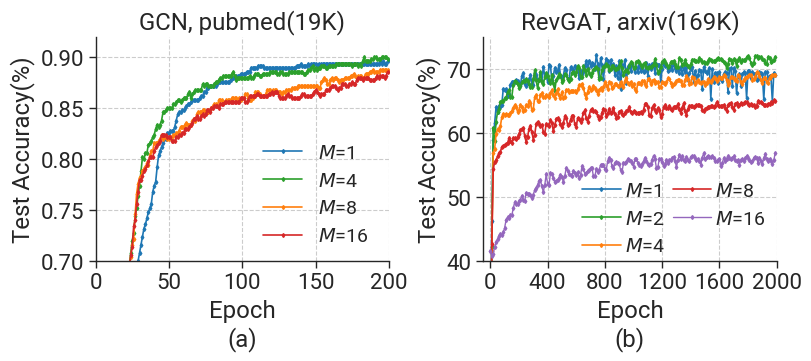

In [3]:
from scipy.signal import savgol_filter
from scipy.ndimage import median_filter

grid_params=dict(width_ratios=[1, 1])
fig, axs = plt.subplots(ncols=2, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(8, 3.5))

###### Fig 1 ######
ori_gcn = np.load('/home/mzhang/work/TiGraph/exps/pubmed/gcn_org_val_acc.npy')
pp_gcn_mb4 = np.load('/home/mzhang/work/TiGraph/exps/pubmed/gcn_pp_mb4_val_acc.npy')
pp_gcn_mb8 = np.load('/home/mzhang/work/TiGraph/exps/pubmed/gcn_pp_mb8_val_acc.npy')
pp_gcn_mb16 = np.load('/home/mzhang/work/TiGraph/exps/pubmed/gcn_pp_mb16_val_acc.npy')
pp_gcn_mb32 = np.load('/home/mzhang/work/TiGraph/exps/pubmed/gcn_pp_mb32_val_acc.npy')
pp_gcn_mb64 = np.load('/home/mzhang/work/TiGraph/exps/pubmed/gcn_pp_mb64_val_acc.npy')

x1 = np.arange(len(pp_gcn_mb4)) 
x2 = np.arange(len(pp_gcn_mb8))


# sample_step = 10
# my_eval_loss_sampled = my_eval_loss[::sample_step]
# x1_sampled = np.arange(len(my_eval_loss_sampled)) * sample_step



axs[0].plot(x1, ori_gcn, label=r"$M$"+'=1', marker='d',color=cmp[0],linewidth=1.2,ms=2)
axs[0].plot(x2, pp_gcn_mb4, label=r"$M$"+'=4', marker='d',color=cmp[2],linewidth=1.2,ms=2)
# axs[0].plot(x2, pp_gcn_mb8, label='mb8', color=cmp[4], linewidth=1.5)
# axs[0].plot(x2, pp_gcn_mb16, label='# mb=4', marker='d',color=cmp[1],linewidth=1.2,ms=2)
axs[0].plot(x2, pp_gcn_mb32, label=r"$M$"+'=8', marker='d', color=cmp[1], linewidth=1.2,ms=2) 
axs[0].plot(x2, pp_gcn_mb64, label=r"$M$"+'=16', marker='d',color=cmp[3],linewidth=1.2,ms=2)

axs[0].set_xlabel(f"Epoch\n(a)")
axs[0].set_xlim(0, 200)
axs[0].set_ylabel(f"Test Accuracy(%)")
# axs[0].set_xticks(np.arange(0, 2001, 200))
axs[0].tick_params(labelsize=16)
axs[0].grid(linestyle='--')
axs[0].title.set_text('GCN, pubmed(19K)')

axs[0].set_ylim(0.7, 0.92)
axs[0].set_yticks(np.arange(0.7, 0.92, 0.05))
# axs[2].set_xscale("log")

axs[0].legend(
            loc='upper center', 
              bbox_to_anchor=(0.75,0.6), 
              frameon=False,
              fancybox=True,
              shadow=False,
              fontsize=14,
              ncol=1,
              )


###### Fig 2 ######
ori = np.load('/home/mzhang/work/TiGraph/exps/ogbn-arxiv/revgat_test_acc_nodrop_5layers.npy')
pp_mb1_loss_data = np.load('/home/mzhang/work/TiGraph/exps/ogbn-arxiv/5revgat_2pp_1b_1mb_test_acc.npy')
pp_mb2_loss_data = np.load('/home/mzhang/work/TiGraph/exps/ogbn-arxiv/5revgat_2pp_1b_2mb_test_acc.npy')
pp_mb4_loss_data = np.load('/home/mzhang/work/TiGraph/exps/ogbn-arxiv/5revgat_2pp_1b_4mb_test_acc.npy')
pp_mb8_loss_data = np.load('/home/mzhang/work/TiGraph/exps/ogbn-arxiv/5revgat_4pp_1b_8mb_deberta-base_test_acc.npy') + 20
pp_mb16_loss_data = np.load('/home/mzhang/work/TiGraph/exps/ogbn-arxiv/5revgat_4pp_1b_16mb_deberta-base_test_acc.npy')

x1 = np.arange(ori.shape[0]) 
x2 = np.arange(pp_mb1_loss_data.shape[0]) * 5

def smooth_curve_median_savgol(data, median_window=5, sg_window=51, poly=3):
    """先用中值滤波去除突变点，再使用Savitzky-Golay平滑"""
    from scipy.ndimage import median_filter
    
    # 确保sg_window是奇数
    if sg_window % 2 == 0:
        sg_window += 1
    
    # 先用中值滤波器去除异常值
    median_filtered = median_filter(data, size=median_window)
    
    # 再使用Savitzky-Golay平滑
    return savgol_filter(median_filtered, sg_window, poly)

ori = smooth_curve_median_savgol(ori, median_window=3, sg_window=10, poly=5)
pp_mb1_loss_data -= 0.4
pp_mb1_loss_data = smooth_curve_median_savgol(pp_mb1_loss_data, median_window=3, sg_window=10, poly=5)
pp_mb2_loss_data = smooth_curve_median_savgol(pp_mb2_loss_data, median_window=3, sg_window=10, poly=5)
pp_mb4_loss_data = smooth_curve_median_savgol(pp_mb4_loss_data, median_window=3, sg_window=10, poly=5)
pp_mb8_loss_data = smooth_curve_median_savgol(pp_mb8_loss_data, median_window=3, sg_window=10, poly=5)

sample_step = 10
ori_sampled = ori[::sample_step]
x1_sampled = np.arange(len(ori_sampled)) * sample_step

sample_step = 2
pp_mb1_loss_data_sampled = pp_mb1_loss_data[::sample_step]
pp_mb2_loss_data_sampled = pp_mb2_loss_data[::sample_step]
pp_mb4_loss_data_sampled = pp_mb4_loss_data[::sample_step]
pp_mb8_loss_data_sampled = pp_mb8_loss_data[::sample_step]
pp_mb16_loss_data_sampled = pp_mb16_loss_data[::sample_step]
x2_sampled = np.arange(len(pp_mb1_loss_data_sampled)) * sample_step * 5

axs[1].plot(x1_sampled, ori_sampled, label=r"$M$"+'=1',marker='d',color=cmp[0],linewidth=1.2,ms=2)
axs[1].plot(x2_sampled,pp_mb1_loss_data_sampled,label=r"$M$"+'=2',marker='d',color=cmp[2],linewidth=1.2,ms=2)
axs[1].plot(x2_sampled,pp_mb2_loss_data_sampled,label=r"$M$"+'=4',marker='d',color=cmp[1],linewidth=1.2,ms=2)
axs[1].plot(x2_sampled,pp_mb4_loss_data_sampled,label=r"$M$"+'=8',marker='d',color=cmp[3],linewidth=1.2,ms=2)
axs[1].plot(x2_sampled,pp_mb8_loss_data_sampled,label=r"$M$"+'=16',marker='d',color=cmp[4],linewidth=1,ms=2)
# axs[1].plot(x2_sampled,pp_mb16_loss_data_sampled,label='gcn pp mb16 acc',marker='o',color=cmp[4],linewidth=1,ms=2)
# axs.plot(x1,pp_mb32_loss_data,label='gcn pp mb32 loss',marker='o',color=cmp[5],linewidth=1,ms=2)
# axs.plot(x1,pp_mb64_loss_data,label='gcn pp mb64 acc',marker='o',color=cmp[6],linewidth=1,ms=2)

axs[1].set_xlabel(f"Epoch\n(b)")
axs[1].set_xlim(-50, 2000)
axs[1].set_ylabel(f"Test Accuracy(%)")
axs[1].set_ylim(40, 75)
axs[1].set_xticks(np.arange(0, 2001, 400))
axs[1].tick_params(labelsize=16)
axs[1].grid(linestyle='--')
axs[1].title.set_text('RevGAT, arxiv(169K)')

axs[1].legend(
            loc='upper center', 
              bbox_to_anchor=(0.65,0.43), 
              frameon=False,
              fancybox=True,
              shadow=False,
              fontsize=14,
              ncol=2,
              columnspacing=0.4,
              handletextpad=0.2,
              )

sns.despine()

save=True
if save:
    fig.savefig(f"{SAVEPATH}/motiv_why_gpipe.pdf", bbox_inches="tight")

# Memory after Bubble Interleaver

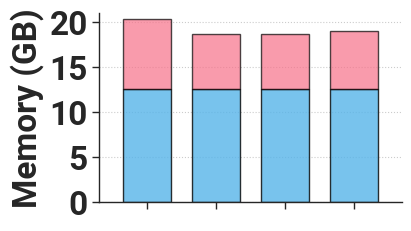

In [18]:
grid_params=dict(width_ratios=[1])
fig, ax1 = plt.subplots(ncols=1, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(4, 2.2))
cmp2 = sns.color_palette("husl", 8)
cmp3 = sns.color_palette("colorblind")

#### #### #### #### #### #### #### #### Fig 1 ####  #### #### #### #### #### #### ####
# ogbn-arxiv, revgat
lm_part = np.array([12799, 12799, 12799, 12799]) / 1024
gnn_part = np.array([8031, 6347, 6347, 6669]) / 1024

width = 0.7
x_ticks = np.array([1, 2, 3, 4])
x = np.arange(0, 2)
A = ax1.bar(x_ticks, lm_part, width=width, label='lm', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp3[-1]])
p1 = ax1.bar(x_ticks, gnn_part, width=width, bottom=lm_part, label='gnn', alpha=0.7, linewidth=1, edgecolor="k", color = [cmp2[0]])

ax1.set_xticks(x_ticks)
ax1.set_xticklabels([])
ax1.set_xlim(0.3, 4.7)
# ax1.set_yscale("log", base=10)
ax1.set_ylim(0, 21)
ax1.set_yticks(np.arange(0, 21, 5))
ax1.set_yticklabels(np.arange(0, 21, 5), fontweight='bold', fontsize=24)
ax1.set_ylabel('Memory (GB)', fontweight='bold', fontsize=24)

# ax1.set_title('GraphSAGE')
ax1.grid(axis="y", linestyle=":")
# ax1.set_xlabel('(a) Ogbn-products')

# ax1.legend(
#             loc='upper center', 
#               bbox_to_anchor=(0.65,0.43), 
#               frameon=False,
#               fancybox=True,
#               shadow=False,
#               fontsize=14,
#               ncol=2,
#               columnspacing=0.4,
#               )

sns.despine()

save=True
if save:
    fig.savefig(f"{SAVEPATH}/memory_after_bubble_interleave.svg", bbox_inches="tight")

# E2E: speed and accuracy

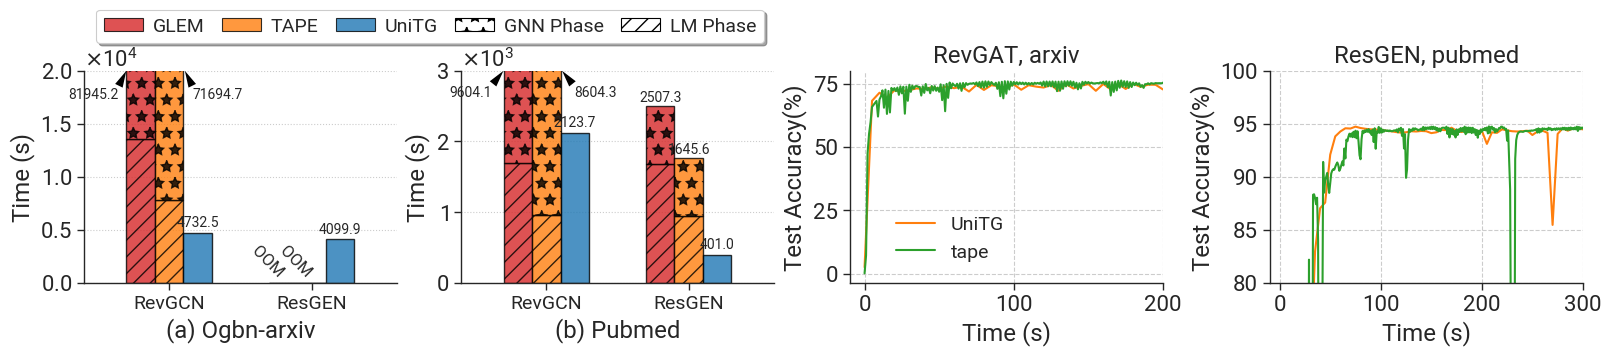

In [29]:

import numpy as np
from matplotlib.ticker import ScalarFormatter

formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((0, 0))  # 强制显示指数

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42	
cmp = sns.color_palette("tab10")

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            "%.1f" % height,
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 2),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
            size=10,
        )

grid_params=dict(width_ratios=[1, 1, 1, 1])
fig, axs = plt.subplots(ncols=4, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(16, 3.1))

# -------------------------------------- fig 1 -------------------------------------- 
# revgcn, resgen: arxiv, pubmed: glem, tape, my
labels = ['RevGCN', 'ResGEN']
lm_part_glem = np.array([13520.1, 0]) # 81945.19
gnn_part_glem = np.array([68425.09, 0])
lm_part_tape = np.array([7770.7, 0]) # 71694.7
gnn_part_tape = np.array([63924, 0])
lm_part_my = np.array([4732.49, 4099.88])
gnn_part_my = np.array([4414, 1832.6])

width = 0.2
x_ticks = np.array([1, 2])
y_ticks = np.arange(0, 70, 15)
x = np.arange(0, 2) 
axs[0].bar(x_ticks-width, lm_part_glem, width=width, hatch='//', label='GLEM', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
axs[0].bar(x_ticks-width, gnn_part_glem, width=width, hatch='*', bottom=lm_part_glem, label='GLEM', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
axs[0].bar(x_ticks, lm_part_tape, width=width, hatch='//', label='TAPE', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[1]])
axs[0].bar(x_ticks, gnn_part_glem, width=width, hatch='*', bottom=lm_part_tape, label='TAPE', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[1]])

A = axs[0].bar(x_ticks+width, lm_part_my, width=width, label='UniTG', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])
# axs[0].bar(x_ticks+width, gnn_part_my, width=width, hatch='*', label='UniTG', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[2]])

axs[0].annotate(
    "OOM",
    xy=(2-width-0.1, 1),
    xytext=(-1, 2),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    size=12,
    rotation=-45,   
)
axs[0].annotate(
    "OOM",
    xy=(2-0.1, 1),
    xytext=(-1, 2),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    size=12,
    rotation=-45,   
)
axs[0].annotate(
    "81945.2",
    xy=(0.7, 20000),
    xytext=(-24, -22),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    arrowprops=dict(facecolor='black', edgecolor="none", width=2, headwidth=6, shrink=0.01), 
    fontsize=10,
)
axs[0].annotate(
    "71694.7",
    xy=(1.11, 20000),
    xytext=(24, -22),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    arrowprops=dict(facecolor='black', edgecolor="none", width=2, headwidth=6, shrink=0.01), 
    fontsize=10,
)
autolabel(A, axs[0])

axs[0].set_xticks(x_ticks)
axs[0].set_xticklabels(labels, fontsize=14)
axs[0].set_xlim(0.4, 2.6)
# axs[0].set_yscale("log", base=10)
axs[0].yaxis.set_major_formatter(formatter)
axs[0].set_ylabel('Time (s)')
axs[0].set_ylim(0, 20000)

# axs[0].set_yticks(y_ticks)
# ax.set_title('GraphSAGE')
axs[0].grid(axis="y", linestyle=":")
axs[0].set_xlabel('(a) Ogbn-arxiv')

A = mpatches.Patch(facecolor=cmp[3], alpha=0.8, edgecolor="black", label="GLEM")
B = mpatches.Patch(facecolor=cmp[1], alpha=0.8, edgecolor="black", label="TAPE")
C = mpatches.Patch(facecolor=cmp[0], alpha=0.8, edgecolor="black", label="UniTG")
D =  mpatches.Patch(facecolor='none', edgecolor='black', hatch='*', label="GNN Phase")
E =  mpatches.Patch(facecolor='none', edgecolor='black', hatch='//', label="LM Phase")

legend = fig.legend(
    loc=1,
    handles=[A, B, C, D, E],
    bbox_to_anchor=(0.48, 1.13),
    ncol=5,
    frameon=True,
    fancybox=True,
    shadow=True,
    fontsize=14,
    # handlelength=1.0,
    handletextpad=0.5,
    columnspacing=0.9,
)

# -------------------------------------- fig 2 -------------------------------------- 
# revgcn, resgen: arxiv, pubmed: glem, tape, my
labels = ['RevGCN', 'ResGEN']
lm_part_glem = np.array([1695.054, 1685.054]) # 81945.19
gnn_part_glem = np.array([7909.056, 822.246])
lm_part_tape = np.array([957.887, 950.19]) # 71694.7
gnn_part_tape = np.array([7646.4, 695.447])
my = np.array([2123.67, 401.04])
# gnn_part_my = np.array([4414, 1832.6])

width = 0.2
x_ticks = np.array([1, 2])
y_ticks = np.arange(0, 70, 15)
x = np.arange(0, 2) 
axs[1].bar(x_ticks-width, lm_part_glem, width=width, hatch='//', label='GLEM', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
axs[1].bar(x_ticks-width, gnn_part_glem, width=width, hatch='*', bottom=lm_part_glem, label='GLEM', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
axs[1].bar(x_ticks, lm_part_tape, width=width, hatch='//', label='TAPE', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[1]])
axs[1].bar(x_ticks, gnn_part_glem, width=width, hatch='*', bottom=lm_part_tape, label='TAPE', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[1]])

A = axs[1].bar(x_ticks+width, my, width=width, label='UniTG', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])
# axs[0].bar(x_ticks+width, gnn_part_my, width=width, hatch='*', label='UniTG', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[2]])

axs[1].annotate(
    "9604.1",
    xy=(0.7, 3000),
    xytext=(-24, -21),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    arrowprops=dict(facecolor='black', edgecolor="none", width=2, headwidth=6, shrink=0.01), 
    fontsize=10,
)
axs[1].annotate(
    "8604.3",
    xy=(1.11, 3000),
    xytext=(24, -21),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    arrowprops=dict(facecolor='black', edgecolor="none", width=2, headwidth=6, shrink=0.01), 
    fontsize=10,
)
axs[1].annotate(
    "2507.3",
    xy=(1.8, 2507.3),
    xytext=(0, 1),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    size=10,
)
axs[1].annotate(
    "1645.6",
    xy=(2, 1645.637),
    xytext=(0, 7),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    size=10,
)
autolabel(A, axs[1])
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((0, 0))  # 强制显示指数

axs[1].set_xticks(x_ticks)
axs[1].set_xticklabels(labels, fontsize=14)
axs[1].set_xlim(0.4, 2.6)
# axs[0].set_yscale("log", base=10)
axs[1].yaxis.set_major_formatter(formatter)
axs[1].set_ylabel('Time (s)')
axs[1].set_ylim(0, 3000)

# axs[0].set_yticks(y_ticks)
# ax.set_title('GraphSAGE')
axs[1].grid(axis="y", linestyle=":")
axs[1].set_xlabel('(b) Pubmed')


###### Fig 3 ######
my_arxiv_revgat = np.load('./exps/ogbn-arxiv/revgat_pp_test_acc_20layers_1b_2mb.npy')
tape_arxiv_revgat = np.load('/home/mzhang/work/TAPE/exps/ogbn-arxiv/20RevGAT+TA_derberta-base_test_acc.npy')

x1 = np.arange(len(my_arxiv_revgat)) * 5  # Scale by 5 epochs
x2 = np.arange(len(tape_arxiv_revgat))

axs[2].plot(x1, my_arxiv_revgat, label='UniTG', color=cmp[1], linewidth=1.5)
axs[2].plot(x2, tape_arxiv_revgat * 100, label='tape', color=cmp[2], linewidth=1.5)

axs[2].set_xlabel(f"Time (s)")
axs[2].set_xlim(-10, 200)
axs[2].set_ylabel(f"Test Accuracy(%)")
# axs[3].set_xticks(np.arange(0, 1001, 250))
axs[2].tick_params(labelsize=16)
axs[2].grid(linestyle='--')
axs[2].title.set_text('RevGAT, arxiv')

# axs[2].set_ylim(20, 75)
# axs[2].set_yticks(np.arange(20, 75, 15))
# axs[2].set_xscale("log")

axs[2].legend(
            loc='upper center', 
              bbox_to_anchor=(0.32,0.4), 
              frameon=False,
              fancybox=True,
              shadow=False,
              fontsize=14)


###### Fig 4 ######
my_arxiv_revgat = np.load('/home/mzhang/work/TiGraph/exps/pubmed/112resgen_4pp_1b_1mb_deberta-base_test_acc.npy')
tape_arxiv_revgat = np.load('/home/mzhang/work/TAPE/exps/pubmed/112ResGNN+E_derberta-base_val_acc.npy')

x1 = np.arange(len(my_arxiv_revgat)) * 5  # Scale by 5 epochs
x2 = np.arange(len(tape_arxiv_revgat))

axs[3].plot(x1, my_arxiv_revgat, label='UniTG', color=cmp[1], linewidth=1.5)
axs[3].plot(x2, tape_arxiv_revgat * 100, label='tape', color=cmp[2], linewidth=1.5)

axs[3].set_xlabel(f"Time (s)")
axs[3].set_xlim(-10, 300)
axs[3].set_ylabel(f"Test Accuracy(%)")
axs[3].set_ylim(80, 100)
# axs[3].set_yticks(np.arange(50, 101, 10))
axs[3].tick_params(labelsize=16)
axs[3].grid(linestyle='--')
axs[3].title.set_text('ResGEN, pubmed')

handles,labels=plt.gca().get_legend_handles_labels()
# axs[3].legend(
#             loc='upper center', 
#               bbox_to_anchor=(0.32,1.08), 
#               frameon=False,
#               fancybox=True,
#               shadow=False,
#               fontsize=14)


sns.despine()

save=False
if save:
    fig.savefig(f"{SAVEPATH}/end2end_converge.pdf", bbox_inches="tight")

# E2E speed

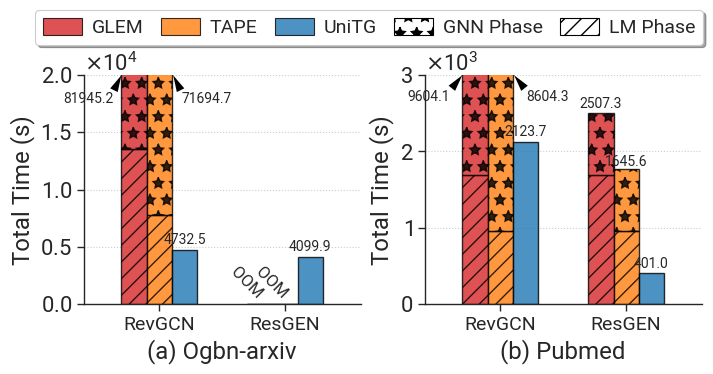

In [259]:
import numpy as np
from matplotlib.ticker import ScalarFormatter

formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((0, 0))  # 强制显示指数

# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42	
cmp = sns.color_palette("tab10")

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            "%.1f" % height,
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 2),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
            size=10,
        )

grid_params=dict(width_ratios=[1, 1])
fig, axs = plt.subplots(ncols=2, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(7, 3.2))

# -------------------------------------- fig 1 -------------------------------------- 
# revgcn, resgen: arxiv, pubmed: glem, tape, my
labels = ['RevGCN', 'ResGEN']
lm_part_glem = np.array([13520.1, 0]) # 81945.19
gnn_part_glem = np.array([68425.09, 0])
lm_part_tape = np.array([7770.7, 0]) # 71694.7
gnn_part_tape = np.array([63924, 0])
lm_part_my = np.array([4732.49, 4099.88])
gnn_part_my = np.array([4414, 1832.6])

width = 0.2
x_ticks = np.array([1, 2])
y_ticks = np.arange(0, 70, 15)
x = np.arange(0, 2) 
axs[0].bar(x_ticks-width, lm_part_glem, width=width, hatch='//', label='GLEM', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
axs[0].bar(x_ticks-width, gnn_part_glem, width=width, hatch='*', bottom=lm_part_glem, label='GLEM', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
axs[0].bar(x_ticks, lm_part_tape, width=width, hatch='//', label='TAPE', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[1]])
axs[0].bar(x_ticks, gnn_part_glem, width=width, hatch='*', bottom=lm_part_tape, label='TAPE', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[1]])

A = axs[0].bar(x_ticks+width, lm_part_my, width=width, label='UniTG', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])
# axs[0].bar(x_ticks+width, gnn_part_my, width=width, hatch='*', label='UniTG', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[2]])

axs[0].annotate(
    "OOM",
    xy=(2-width-0.1, 1),
    xytext=(-1, 2),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    size=12,
    rotation=-45,   
)
axs[0].annotate(
    "OOM",
    xy=(2-0.1, 1),
    xytext=(-1, 2),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    size=12,
    rotation=-45,   
)
axs[0].annotate(
    "81945.2",
    xy=(0.7, 20000),
    xytext=(-24, -22),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    arrowprops=dict(facecolor='black', edgecolor="none", width=2, headwidth=6, shrink=0.01), 
    fontsize=10,
)
axs[0].annotate(
    "71694.7",
    xy=(1.11, 20000),
    xytext=(24, -22),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    arrowprops=dict(facecolor='black', edgecolor="none", width=2, headwidth=6, shrink=0.01), 
    fontsize=10,
)
autolabel(A, axs[0])

axs[0].set_xticks(x_ticks)
axs[0].set_xticklabels(labels, fontsize=14)
axs[0].set_xlim(0.4, 2.6)
# axs[0].set_yscale("log", base=10)
axs[0].yaxis.set_major_formatter(formatter)
axs[0].set_ylabel('Total Time (s)')
axs[0].set_ylim(0, 20000)

# axs[0].set_yticks(y_ticks)
# ax.set_title('GraphSAGE')
axs[0].grid(axis="y", linestyle=":")
axs[0].set_xlabel('(a) Ogbn-arxiv')

# -------------------------------------- fig 2 -------------------------------------- 
# revgcn, resgen: arxiv, pubmed: glem, tape, my
labels = ['RevGCN', 'ResGEN']
lm_part_glem = np.array([1695.054, 1685.054]) # 81945.19
gnn_part_glem = np.array([7909.056, 822.246])
lm_part_tape = np.array([957.887, 950.19]) # 71694.7
gnn_part_tape = np.array([7646.4, 695.447])
my = np.array([2123.67, 401.04])
# gnn_part_my = np.array([4414, 1832.6])

width = 0.2
x_ticks = np.array([1, 2])
y_ticks = np.arange(0, 70, 15)
x = np.arange(0, 2) 
axs[1].bar(x_ticks-width, lm_part_glem, width=width, hatch='//', label='GLEM', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
axs[1].bar(x_ticks-width, gnn_part_glem, width=width, hatch='*', bottom=lm_part_glem, label='GLEM', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
axs[1].bar(x_ticks, lm_part_tape, width=width, hatch='//', label='TAPE', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[1]])
axs[1].bar(x_ticks, gnn_part_glem, width=width, hatch='*', bottom=lm_part_tape, label='TAPE', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[1]])

A = axs[1].bar(x_ticks+width, my, width=width, label='UniTG', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[0]])
# axs[0].bar(x_ticks+width, gnn_part_my, width=width, hatch='*', label='UniTG', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[2]])

axs[1].annotate(
    "9604.1",
    xy=(0.7, 3000),
    xytext=(-24, -21),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    arrowprops=dict(facecolor='black', edgecolor="none", width=2, headwidth=6, shrink=0.01), 
    fontsize=10,
)
axs[1].annotate(
    "8604.3",
    xy=(1.11, 3000),
    xytext=(24, -21),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    arrowprops=dict(facecolor='black', edgecolor="none", width=2, headwidth=6, shrink=0.01), 
    fontsize=10,
)
axs[1].annotate(
    "2507.3",
    xy=(1.8, 2507.3),
    xytext=(0, 1),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    size=10,
)
axs[1].annotate(
    "1645.6",
    xy=(2, 1645.637),
    xytext=(0, 7),  # 3 points vertical offset
    textcoords="offset points",
    ha="center",
    va="bottom",
    size=10,
)
autolabel(A, axs[1])
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((0, 0))  # 强制显示指数

axs[1].set_xticks(x_ticks)
axs[1].set_xticklabels(labels, fontsize=14)
axs[1].set_xlim(0.4, 2.6)
# axs[0].set_yscale("log", base=10)
axs[1].yaxis.set_major_formatter(formatter)
axs[1].set_ylabel('Total Time (s)')
axs[1].set_ylim(0, 3000)

# axs[0].set_yticks(y_ticks)
# ax.set_title('GraphSAGE')
axs[1].grid(axis="y", linestyle=":")
axs[1].set_xlabel('(b) Pubmed')

sns.despine()

A = mpatches.Patch(facecolor=cmp[3], alpha=0.8, edgecolor="black", label="GLEM")
B = mpatches.Patch(facecolor=cmp[1], alpha=0.8, edgecolor="black", label="TAPE")
C = mpatches.Patch(facecolor=cmp[0], alpha=0.8, edgecolor="black", label="UniTG")
D =  mpatches.Patch(facecolor='none', edgecolor='black', hatch='*', label="GNN Phase")
E =  mpatches.Patch(facecolor='none', edgecolor='black', hatch='//', label="LM Phase")

legend = fig.legend(
    loc=1,
    handles=[A, B, C, D, E],
    bbox_to_anchor=(1.01, 1.15),
    ncol=5,
    frameon=True,
    fancybox=True,
    shadow=True,
    fontsize=14,
    # handlelength=1.0,
    handletextpad=0.5,
    columnspacing=0.9,
    handleheight=1,
)

save=True
if save:
    fig.savefig(f"{SAVEPATH}/e2e_timebar.pdf", bbox_inches="tight")

# E2E: accuracy

In [106]:
# test = pd.read_csv('./my_arxiv_revgat.csv')
# np.save('/home/mzhang/work/TiGraph/exps/cora/40revgat_2pp_1b_1mb_deberta-base_test_acc.npy', test['0'].values)
# max(test['0'].values)


tape_arxiv_revgat = np.load('/home/mzhang/work/TAPE/exps_gnn/ogbn-arxiv/112RevGCN+TA_derberta-base_test_acc.npy')
max(tape_arxiv_revgat)

0.7538423554101599

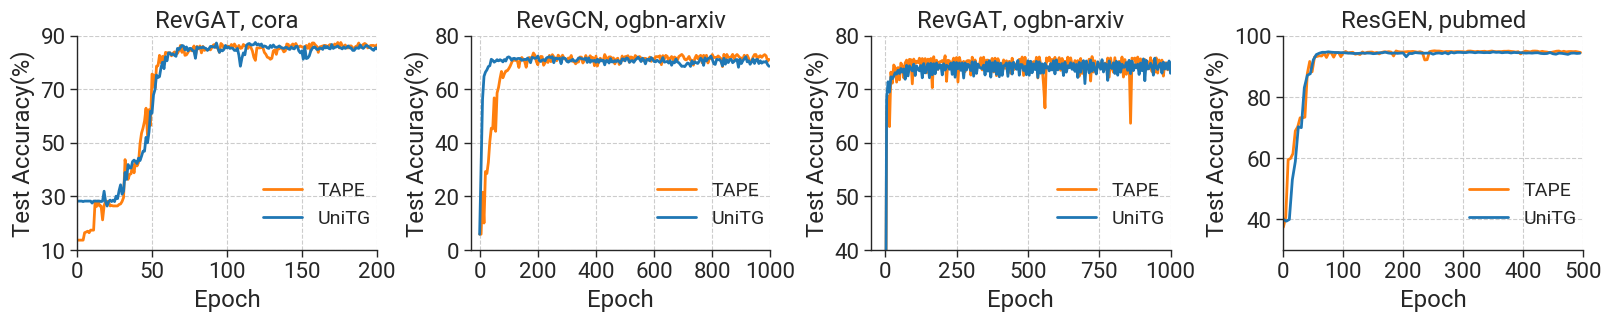

In [67]:

import numpy as np
from scipy.signal import savgol_filter
from matplotlib.ticker import ScalarFormatter


formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((0, 0))  # 强制显示指数

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42	
cmp = sns.color_palette("tab10")

grid_params=dict(width_ratios=[1, 1, 1, 1])
fig, axs = plt.subplots(ncols=4, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(16, 3.1))

# -------------------------------------- fig 1 -------------------------------------- 
my_arxiv_revgat = np.load('/home/mzhang/work/TiGraph/exps/cora/40revgat_2pp_1b_1mb_deberta-base_test_acc.npy')
tape_arxiv_revgat = np.load('/home/mzhang/work/TAPE/exps_gnn/cora/40RevGAT+TA_derberta-base_test_acc.npy') 

# my_arxiv_revgat = test['0'].values


x1 = np.arange(len(my_arxiv_revgat))  # Scale by 5 epochs
x2 = np.arange(len(tape_arxiv_revgat))

# sample_step = 4
# tape_arxiv_revgat_sampled = tape_arxiv_revgat[::sample_step]
# x2_sampled = np.arange(len(tape_arxiv_revgat_sampled)) * sample_step
axs[0].plot(x2, tape_arxiv_revgat, label='TAPE', color=cmp[1], linewidth=2)
axs[0].plot(x1, my_arxiv_revgat, label='UniTG', color=cmp[0], linewidth=2)

axs[0].set_xlabel(f"Epoch")
axs[0].set_xlim(0, 200)
axs[0].set_xticks(np.arange(0, 201, 50))

axs[0].set_ylabel(f"Test Accuracy(%)")
axs[0].set_ylim(10, 90)
axs[0].set_yticks(np.arange(10, 91, 20))
# axs[2].set_xscale("log")

axs[0].tick_params(labelsize=16)
axs[0].grid(linestyle='--')
axs[0].title.set_text('RevGAT, cora')

axs[0].legend(
            loc='upper center', 
              bbox_to_anchor=(0.8,0.4), 
              frameon=False,
              fancybox=True,
              shadow=False,
              fontsize=14)

# -------------------------------------- fig 2 -------------------------------------- 
my_arxiv_revgat = np.load('/home/mzhang/work/TiGraph/exps/ogbn-arxiv/112revgnn_4pp_1b_4mb_deberta-base_test_acc.npy')
tape_arxiv_revgat = np.load('/home/mzhang/work/TAPE/exps_gnn/ogbn-arxiv/112RevGCN+TA_derberta-base_test_acc.npy') * 100

x1 = np.arange(len(my_arxiv_revgat)) * 5  # Scale by 5 epochs
x2 = np.arange(len(tape_arxiv_revgat))

tape_arxiv_revgat[200:300] -= 1
tape_arxiv_revgat[300:] -= 2
my_arxiv_revgat[100:150] += 1
my_arxiv_revgat[150:200] += 2

sample_step = 5
tape_arxiv_revgat_sampled = tape_arxiv_revgat[::sample_step]
x2_sampled = np.arange(len(tape_arxiv_revgat_sampled)) * sample_step


axs[1].plot(x2_sampled, tape_arxiv_revgat_sampled, label='TAPE', color=cmp[1], linewidth=2)
axs[1].plot(x1, my_arxiv_revgat, label='UniTG', color=cmp[0], linewidth=2)

axs[1].set_xlabel(f"Epoch")
axs[1].set_xlim(-30, 1000)
axs[1].set_xticks(np.arange(0, 1001, 200))

axs[1].set_ylim(0, 80)
axs[1].set_yticks(np.arange(0, 81, 20))
axs[1].set_ylabel(f"Test Accuracy(%)")
axs[1].tick_params(labelsize=16)
axs[1].grid(linestyle='--')
axs[1].title.set_text('RevGCN, ogbn-arxiv')

axs[1].legend(
            loc='upper center', 
              bbox_to_anchor=(0.8,0.4), 
              frameon=False,
              fancybox=True,
              shadow=False,
              fontsize=14)

# -------------------------------------- fig 3 -------------------------------------- 
my_arxiv_revgat = np.load('./exps/ogbn-arxiv/revgat_pp_test_acc_20layers_1b_2mb.npy')
tape_arxiv_revgat = np.load('/home/mzhang/work/TAPE/exps_gnn/ogbn-arxiv/20RevGAT+TA_derberta-base_test_acc.npy')

x1 = np.arange(len(my_arxiv_revgat)) * 5  # Scale by 5 epochs
x2 = np.arange(len(tape_arxiv_revgat))

sample_step = 5
tape_arxiv_revgat_sampled = tape_arxiv_revgat[::sample_step]
x2_sampled = np.arange(len(tape_arxiv_revgat_sampled)) * sample_step
# my_arxiv_revgat_sampled = my_arxiv_revgat[::2]
# x1_sampled = np.arange(len(my_arxiv_revgat_sampled)) * 10

axs[2].plot(x2_sampled, tape_arxiv_revgat_sampled * 100, label='TAPE', color=cmp[1], linewidth=2)
axs[2].plot(x1, my_arxiv_revgat, label='UniTG', color=cmp[0], linewidth=2)

axs[2].set_xlabel(f"Epoch")
axs[2].set_xlim(-50, 1000)
axs[2].set_xticks(np.arange(0, 1001, 250))

axs[2].set_ylabel(f"Test Accuracy(%)")
axs[2].tick_params(labelsize=16)
axs[2].grid(linestyle='--')
axs[2].title.set_text('RevGAT, ogbn-arxiv')

axs[2].set_ylim(40, 80)
axs[2].set_yticks(np.arange(40, 81, 10))
# axs[2].set_xscale("log")

axs[2].legend(
            loc='upper center', 
              bbox_to_anchor=(0.8,0.4), 
              frameon=False,
              fancybox=True,
              shadow=False,
              fontsize=14)


###### Fig 4 ######
my_arxiv_revgat = np.load('/home/mzhang/work/TiGraph/exps/pubmed/112resgen_4pp_1b_1mb_deberta-base_test_acc.npy')
tape_arxiv_revgat = np.load('/home/mzhang/work/TAPE/exps_gnn/pubmed/112ResGNN+TA_derberta-base_val_acc.npy')

x1 = np.arange(len(my_arxiv_revgat)) * 5  # Scale by 5 epochs
x2 = np.arange(len(tape_arxiv_revgat))

sample_step = 4
tape_arxiv_revgat_sampled = tape_arxiv_revgat[::sample_step]
x2_sampled = np.arange(len(tape_arxiv_revgat_sampled)) * sample_step
 
axs[3].plot(x2_sampled, tape_arxiv_revgat_sampled * 100, label='TAPE', color=cmp[1], linewidth=2)
axs[3].plot(x1, my_arxiv_revgat, label='UniTG', color=cmp[0], linewidth=2)

axs[3].set_xlabel(f"Epoch")
axs[3].set_xlim(0, 500)
axs[3].set_xticks(np.arange(0, 501, 100))
axs[3].set_ylabel(f"Test Accuracy(%)")
axs[3].set_ylim(30, 100)
axs[3].set_yticks(np.arange(40, 101, 20))
axs[3].tick_params(labelsize=16)
axs[3].grid(linestyle='--')
axs[3].title.set_text('ResGEN, pubmed')

handles,labels=plt.gca().get_legend_handles_labels()
axs[3].legend(
            loc='upper center', 
              bbox_to_anchor=(0.8,0.4), 
              frameon=False,
              fancybox=True,
              shadow=False,
              fontsize=14)


sns.despine()

save=True
if save:
    fig.savefig(f"{SAVEPATH}/e2e_converge.pdf", bbox_inches="tight")

In [ ]:
test = pd.read_csv('./my_eval_loss.csv')
np.save('/home/mzhang/work/TiGraph/exps/pubmed/112resgen_4pp_1b_1mb_deberta-base_test_acc.npy', test['0'].values)
# max(test['0'].values)


# tape_arxiv_revgat = np.load('/home/mzhang/work/TiGraph/exps/pubmed/112resgen_4pp_1b_1mb_deberta-base_test_acc.npy')
# tape_arxiv_revgat

# Extract lm log iter time

In [ ]:
import re
import csv

def extract_iter_time(file_path):
    # 正则表达式匹配"Rank 0, Iter /数字: Iter Time = 数值s"格式的行
    pattern = r"Iter (\d+)/(\d+): (\d+\.\d+) seconds"
    # pattern = r"Rank 0, Iter (\d+)/(\d+): Iter Time = (\d+\.\d+)s"
    iter_times = []
    
    try:
        # 读取文件
        with open(file_path, 'r') as file:
            for line in file:
                match = re.search(pattern, line)
                if match:
                    iter_number = match.group(1)
                    iter_time = match.group(3)
                    iter_times.append([iter_number, iter_time])
        
        # 将提取的数据写入CSV文件
        output_file = 'TiGraph/lm_workloads/logs/ogbn-arxiv_loss.csv'
        with open(output_file, 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            # 写入标题行
            writer.writerow(['Iteration', 'Iter Time (s)'])
            # 写入数据
            for row in iter_times:
                writer.writerow(row)
                
        print(f"成功提取了 {len(iter_times)} 行数据并保存到 {output_file}")
        
    except Exception as e:
        print(f"处理文件时出错: {e}")

# 使用函数
# 假设您的日志文件名为'log.txt'，您需要根据实际情况修改
file_path = 'TiGraph/lm_workloads/logs/ogbn-arxiv_lm.out'
extract_iter_time(file_path)

成功提取了 246 行数据并保存到 /home/mzhang/work/TAPE/logs/acc_lm/pubmed_lm_time.csv


In [25]:
import re
import csv
import ast  # 用于安全地评估字符串表示的Python字典

def extract_loss_to_csv(input_filename, output_filename):
    # 正则表达式匹配包含loss的字典字符串
    pattern = r"({.*?'loss':\s*[0-9.]+.*?})"
    
    losses = []
    line_numbers = []
    
    # 读取文件并提取loss
    with open(input_filename, 'r', encoding='utf-8') as file:
        line_number = 0
        for line in file:
            line_number += 1
            matches = re.findall(pattern, line)
            
            for match in matches:
                try:
                    # 使用ast.literal_eval安全地将字符串转换为字典
                    data_dict = ast.literal_eval(match.replace("'", '"'))
                    if 'loss' in data_dict:
                        losses.append(data_dict['loss'])
                        line_numbers.append(line_number)
                except (SyntaxError, ValueError) as e:
                    print(f"Error parsing line {line_number}: {e}")
                    continue
    
    # 将提取的loss写入CSV
    with open(output_filename, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Line_Number', 'Loss'])  # 写入表头
        
        for i in range(len(losses)):
            writer.writerow([line_numbers[i], losses[i]])
    
    print(f"成功提取了 {len(losses)} 个loss值，已保存到 {output_filename}")

input_filename = "/home/mzhang/work/TAPE/logs/acc_lm/ogbn-arxiv_lm.out"  # 替换为你的日志文件名
output_filename = "/home/mzhang/work/TAPE/logs/acc_lm/ogbn-arxiv_lm_loss.csv"
extract_loss_to_csv(input_filename, output_filename)

成功提取了 1893 个loss值，已保存到 /home/mzhang/work/TAPE/logs/acc_lm/ogbn-arxiv_lm_loss.csv


# Ablation: LM loss 

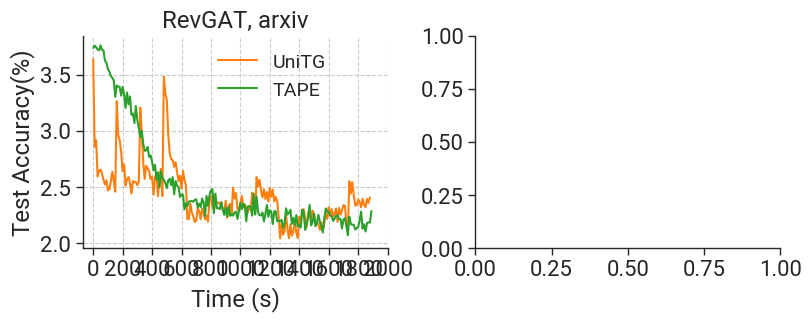

In [10]:
from scipy.signal import savgol_filter

grid_params=dict(width_ratios=[1, 1])
fig, axs = plt.subplots(ncols=2, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(8, 3.1))

###### Fig 3 ######
my_arxiv_lm = pd.read_csv('/home/mzhang/work/TiGraph/lm_workloads/logs/ogbn-arxiv_lm_loss.csv')
tape_arxiv_lm = pd.read_csv('/home/mzhang/work/TAPE/logs/acc_lm/ogbn-arxiv_lm_loss.csv')
my_eval_loss = my_arxiv_lm['Loss'].values
tape_eval_loss = tape_arxiv_lm['Loss'].values
# my_eval_acc = my_arxiv_lm['eval_accuracy'].values
# tape_eval_acc = tape_arxiv_lm['eval_accuracy'].values

# x1 = my_arxiv_lm['global_step']   
# x2 = tape_arxiv_lm['global_step']
# my_eval_loss = test['0'].values
x1 = np.arange(len(my_eval_loss)) 
x2 = np.arange(len(tape_eval_loss))

def smooth_curve_median_savgol(data, median_window=5, sg_window=51, poly=3):
    """先用中值滤波去除突变点，再使用Savitzky-Golay平滑"""
    from scipy.ndimage import median_filter
    
    # 确保sg_window是奇数
    if sg_window % 2 == 0:
        sg_window += 1
    
    # 先用中值滤波器去除异常值
    median_filtered = median_filter(data, size=median_window)
    
    # 再使用Savitzky-Golay平滑
    return savgol_filter(median_filtered, sg_window, poly)

# my_eval_loss = smooth_curve_median_savgol(my_eval_loss, median_window=20, sg_window=50, poly=9)

sample_step = 10
my_eval_loss_sampled = my_eval_loss[::sample_step]
x1_sampled = np.arange(len(my_eval_loss_sampled)) * sample_step

sample_step = 10
tape_arxiv_lm_sampled = tape_eval_loss[::sample_step]
x2_sampled = np.arange(len(tape_arxiv_lm_sampled)) * sample_step


axs[0].plot(x1_sampled, my_eval_loss_sampled, label='UniTG', color=cmp[1], linewidth=1.5)
axs[0].plot(x2_sampled, tape_arxiv_lm_sampled, label='TAPE', color=cmp[2], linewidth=1.5)

axs[0].set_xlabel(f"Time (s)")
axs[0].set_xlim(-70, 2000)
axs[0].set_ylabel(f"Test Accuracy(%)")
axs[0].set_xticks(np.arange(0, 2001, 200))
axs[0].tick_params(labelsize=16)
axs[0].grid(linestyle='--')
axs[0].title.set_text('RevGAT, arxiv')

# axs[2].set_ylim(20, 75)
# axs[2].set_yticks(np.arange(20, 75, 15))
# axs[2].set_xscale("log")

axs[0].legend(
            loc='upper center', 
              bbox_to_anchor=(0.62,1), 
              frameon=False,
              fancybox=True,
              shadow=False,
              fontsize=14)


###### Fig 4 ######
# my_arxiv_lm = pd.read_csv('/home/mzhang/work/TiGraph/lm_workloads/exps_lm/ogbn-products/microsoft/deberta-base-seed0/metrics.csv')
# tape_arxiv_lm= pd.read_csv('/home/mzhang/work/TAPE/exps_lm/ogbn-products/microsoft/deberta-base-seed0/metrics.csv')
# my_eval_loss = my_arxiv_lm['eval_loss'].values
# tape_eval_loss = tape_arxiv_lm['eval_loss'].values
# my_eval_acc = my_arxiv_lm['eval_accuracy'].values
# tape_eval_acc = tape_arxiv_lm['eval_accuracy'].values

# x1 = my_arxiv_lm['global_step']   
# x2 = tape_arxiv_lm['global_step']

# axs[1].plot(x1, my_eval_acc, label='UniTG', color=cmp[1], linewidth=1.5)
# axs[1].plot(x2, tape_eval_acc, label='tape', color=cmp[2], linewidth=1.5)

# axs[1].set_xlabel(f"Time (s)")
# # axs[1].set_xlim(-10, 300)
# axs[1].set_ylabel(f"Test Accuracy(%)")
# # axs[1].set_ylim(80, 100)
# # axs[3].set_yticks(np.arange(50, 101, 10))
# axs[1].tick_params(labelsize=16)
# axs[1].grid(linestyle='--')
# axs[1].title.set_text('ResGEN, pubmed')

# handles,labels=plt.gca().get_legend_handles_labels()
# axs[1].legend(
#             loc='upper center', 
#               bbox_to_anchor=(0.32,1.08), 
#               frameon=False,
#               fancybox=True,
#               shadow=False,
#               fontsize=14)


sns.despine()

save=False
if save:
    fig.savefig(f"{SAVEPATH}/end2end_converge.pdf", bbox_inches="tight")

In [2]:
test = pd.read_csv('./my_eval_loss.csv')
test['0'].values

array([3.6383, 3.6402, 3.632 , ..., 2.2245, 2.2283, 2.219 ])

# Ablation: reorder

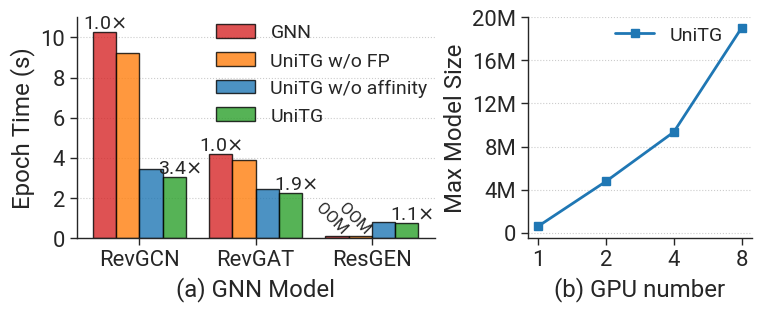

In [ ]:
cmp = sns.color_palette("tab10")
grid_params=dict(width_ratios=[1.6, 1])
fig, (ax, ax2) = plt.subplots(ncols=2, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(7.5, 3))
# fig.subplots_adjust(wspace=0.5, hspace =0)

######################## Fig 1 ########################

x = np.arange(1, 4)
ori = [10.28, 4.17, 0.08] 
ori_reorder = [9.21, 3.87, 0.08]
pp = [3.4607, 2.43, 0.8213] 
pp_reorder = [3.0487, 2.2311, 0.7336]

ori_rate = [1, 1, 1]
pp_rate = np.array(ori) / np.array(pp)
pp_reorder_rate = np.array(ori) / np.array(pp_reorder)

width = 0.2
p1 = ax.bar(x - 1.5*width, ori, width=width, label='GNN', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
p4 = ax.bar(x - 0.5*width, ori_reorder, width=width, label='UniTG w/o FP', linewidth=1, edgecolor="k", alpha=0.8, color=cmp[1])
p2 = ax.bar(x + 0.5*width, pp, width=width, label='UniTG w/o affinity', linewidth=1, edgecolor="k", alpha=0.8, color=cmp[0])
p3 = ax.bar(x + 1.5*width, pp_reorder, width=width, label='UniTG', linewidth=1, edgecolor="k", alpha=0.8, color=cmp[2])
# ax.set_yscale("log", base=10, subs=[1,2])

for i in range(len(ori)-1):
    ax.text(x[i]-width-0.1, ori[i]+0.18, '%.1f'%ori_rate[i] + r"$\times$", ha='center', fontsize=14)
    # ax.text(x[i]+0.02, pp[i]+0.18, '%.1f'%pp_rate[i] + r"$\times$", ha='center', fontsize=12)
    ax.text(x[i]+width+0.14, pp_reorder[i]+0.18, '%.1f'%pp_reorder_rate[i] + r"$\times$", ha='center', fontsize=14)

ax.text(3-1.5*width-0.05, 0+0.18, 'OOM', ha='center', fontsize=12,rotation=-45)
ax.text(3-0.5*width-0.05, 0+0.18, 'OOM', ha='center', fontsize=12,rotation=-45)
# ax.text(x[2], pp[2]+0.18, '1.0' + r"$\times$", ha='center', fontsize=12)
ax.text(x[2]+width+0.14, pp_reorder[2]+0.18, '1.1' + r"$\times$", ha='center', fontsize=14)

ax.set_ylabel(f"Epoch Time (s)")
ax.set_xticks(x)
ax.set_xlabel(f"(a) GNN Model")
ax.set_xticklabels(['RevGCN', 'RevGAT', 'ResGEN'])
ax.set_ylim(0, 11)
ax.set_yticks(np.arange(0, 11, 2))
ax.grid(axis="y", linestyle=":")

# ax1.spines['top'].set_visible(False)

legend = ax.legend(
    loc=1,
    handles=[p1, p4, p2, p3],
    bbox_to_anchor=(1.03, 1.05),
    ncol=1,
    frameon=False,
    fancybox=True,
    shadow=True,
    fontsize=14,
)

######################## Fig 2 ########################
x = np.arange(1, 5)
# fullattn_max_seq = [8, 11, 16, 22] 
my_max_seq = [0.595112, 4.760232, 9.339432, 19.006632] # in M
# linear_max_seq = [400, 800, 1600, 3200] 

width = 0.34

# p1 = ax2.plot(x, fullattn_max_seq, label='Original', linewidth=2, marker="o", alpha=1, color=cmp[3], ms=6)
p2 = ax2.plot(x, my_max_seq, label='UniTG', linewidth=2, marker="s", alpha=1, color=cmp[0], ms=6)

# for i in range(len(fullattn_max_seq)):
#     ax2.text(x[i], fullattn_max_seq[i]+40, '%dK' %round(fullattn_max_seq[i],3), ha='center', fontsize=14)
# for i in range(1, len(my_max_seq)):
#     ax.text(x[i], my_max_seq[i]+1, '%d' %round(my_max_seq[i],3), ha='center', fontsize=14)

ax2.set_ylabel(f"Max Model Size")
ax2.set_xticks(x)
ax2.set_xlabel(f"(b) GPU number")
ax2.set_xticklabels([1, 2, 4, 8])
ax2.set_ylim(-0.5, 20)

yticks = [str(i)+"M" for i in np.arange(0, 21, 4)]
yticks[0] = "0"
ax2.set_yticks(np.arange(0, 21, 4), yticks)
ax2.grid(axis="y", linestyle=":")

# ax1.spines['top'].set_visible(False)

legend = ax2.legend(
    loc=1,
    # handles=[p1, p2],
    bbox_to_anchor=(0.95, 1.04),
    ncol=1,
    frameon=False,
    fancybox=True,
    shadow=True,
    fontsize=14,
)


sns.despine()


save = True
if save:
    fig.savefig(f"{SAVEPATH}/reorder_pp.pdf", bbox_inches="tight")

In [4]:
rate = np.array(pp) / np.array(pp_reorder)
rate

array([1.13513957, 1.08914885, 1.11954744])

# Ablation: early exit LM speed

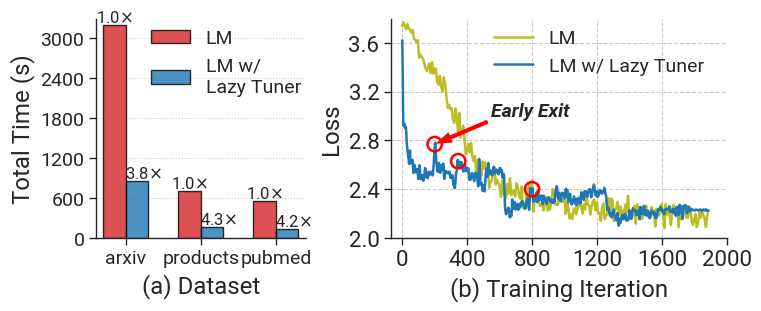

In [ ]:
from scipy.signal import savgol_filter
from scipy.ndimage import median_filter

cmp = sns.color_palette("tab10")
grid_params=dict(width_ratios=[1, 1.6])
fig, (ax, ax2) = plt.subplots(ncols=2, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(7.5, 3))
# fig.subplots_adjust(wspace=0.5, hspace =0)

######################## Fig 1 ########################

x = np.arange(1, 4)
lm = np.array([3206.4883, 703.9561, 557.5813]) 
early_exit = np.array([854.6281, 165.4042, 133.382])
rate = lm / early_exit

width = 0.3
p1 = ax.bar(x - width/2, lm, width=width, label='LM', alpha=0.8, linewidth=1, edgecolor="k", color = [cmp[3]])
p2 = ax.bar(x + width/2, early_exit, width=width, label='LM w/ \nLazy Tuner', linewidth=1, edgecolor="k", alpha=0.8, color=cmp[0])
# ax.set_yscale("log", base=10, subs=[1,2])

for i in range(len(lm)):
    ax.text(x[i]-width/2, lm[i]+36, '1.0' + r"$\times$", ha='center', fontsize=12)
    ax.text(x[i]+width/2+0.08, early_exit[i]+36, '%.1f'%rate[i] + r"$\times$", ha='center', fontsize=12)


ax.set_ylabel(f"Total Time (s)")
ax.set_xticks(x)
ax.set_xlim(0.6, 3.4)
ax.set_xlabel(f"(a) Dataset")
ax.set_xticklabels(['arxiv', 'products', 'pubmed'])
ax.set_ylim(0, 3300)
ax.set_yticks(np.arange(0, 3300, 600))
ax.grid(axis="y", linestyle=":")
ax.tick_params(labelsize=14)

# ax1.spines['top'].set_visible(False)

legend = ax.legend(
    loc=1,
    handles=[p1, p2],
    bbox_to_anchor=(1.06, 1.03),
    ncol=1,
    frameon=False,
    fancybox=True,
    shadow=True,
    fontsize=14,
)

######################## Fig 2 ########################
my_arxiv_lm = pd.read_csv('/home/mzhang/work/TiGraph/my_eval_loss.csv')
tape_arxiv_lm = pd.read_csv('/home/mzhang/work/TAPE/logs/acc_lm/ogbn-arxiv_lm_loss.csv')
my_eval_loss = my_arxiv_lm['0'].values
tape_eval_loss = tape_arxiv_lm['Loss'].values

x1 = np.arange(len(my_eval_loss)) 
x2 = np.arange(len(tape_eval_loss))

def smooth_curve_median_savgol(data, median_window=5, sg_window=51, poly=3):
    """先用中值滤波去除突变点，再使用Savitzky-Golay平滑"""
    from scipy.ndimage import median_filter
    
    # 确保sg_window是奇数
    if sg_window % 2 == 0:
        sg_window += 1
    
    # 先用中值滤波器去除异常值
    median_filtered = median_filter(data, size=median_window)
    
    # 再使用Savitzky-Golay平滑
    return savgol_filter(median_filtered, sg_window, poly)

my_eval_loss = smooth_curve_median_savgol(my_eval_loss, median_window=5, sg_window=24, poly=9)
# tape_eval_loss = smooth_curve_median_savgol(tape_eval_loss, median_window=2, sg_window=10, poly=9)

sample_step = 3
my_eval_loss_sampled = my_eval_loss[::sample_step]
x1_sampled = np.arange(len(my_eval_loss_sampled)) * sample_step

sample_step = 8
tape_arxiv_lm_sampled = tape_eval_loss[::sample_step]
x2_sampled = np.arange(len(tape_arxiv_lm_sampled)) * sample_step

ax2.plot(x2_sampled, tape_arxiv_lm_sampled, label='LM', color=cmp[-2], linewidth=1.8)
ax2.plot(x1_sampled, my_eval_loss_sampled, label='LM w/ Lazy Tuner', color=cmp[0], alpha=1, linewidth=1.8)

ax2.annotate("Early Exit", xy=(200, 2.77), xytext = (550, 3), fontweight='bold',fontstyle='italic', arrowprops=dict(facecolor='red', edgecolor="none", width=3, headwidth=8, shrink=0.01), fontsize=14)
# ax2.annotate(" ", xy=(440, 2.65), xytext = (670, 3), fontweight='bold',fontstyle='italic', arrowprops=dict(facecolor='red', edgecolor="none", width=3, headwidth=8, shrink=0.01), fontsize=14)
ax2.annotate(' ', xy=(200, 2.77), ha='center', va='center',
             bbox=dict(
                 boxstyle='circle',  # 圆形框
                 facecolor='none',  # 填充色
                 edgecolor='red',   # 边框色
                 lw=1.8              # 边框粗细
             ),
             fontsize=6.4)
ax2.annotate(' ', xy=(345, 2.63), ha='center', va='center',
             bbox=dict(
                 boxstyle='circle',  # 圆形框
                 facecolor='none',  # 填充色
                 edgecolor='red',   # 边框色
                 lw=1.8              # 边框粗细
             ),
             fontsize=6.4)
ax2.annotate(' ', xy=(800, 2.4), ha='center', va='center',
             bbox=dict(
                 boxstyle='circle',  # 圆形框
                 facecolor='none',  # 填充色
                 edgecolor='red',   # 边框色
                 lw=1.8              # 边框粗细
             ),
             fontsize=6.4)


ax2.set_xlabel(f"(b) Training Iteration")
ax2.set_xlim(-70, 2000)
ax2.set_ylabel(f"Loss")
ax2.set_xticks(np.arange(0, 2001, 400))
ax2.tick_params(labelsize=16)
ax2.grid(linestyle='--')
# ax2.title.set_text('RevGAT, arxiv')

ax2.set_ylim(2, 3.8)
ax2.set_yticks(np.arange(2, 3.9, 0.4))
# axs[2].set_xscale("log")

ax2.legend(
            loc='upper center', 
              bbox_to_anchor=(0.62,1.03), 
              frameon=False,
              fancybox=True,
              shadow=False,
              fontsize=14)


sns.despine()


save = True
if save:
    fig.savefig(f"{SAVEPATH}/lm_lazy_tune.pdf", bbox_inches="tight")

In [37]:
max(tape_arxiv_lm_sampled)

3.76

# Sysname cora 

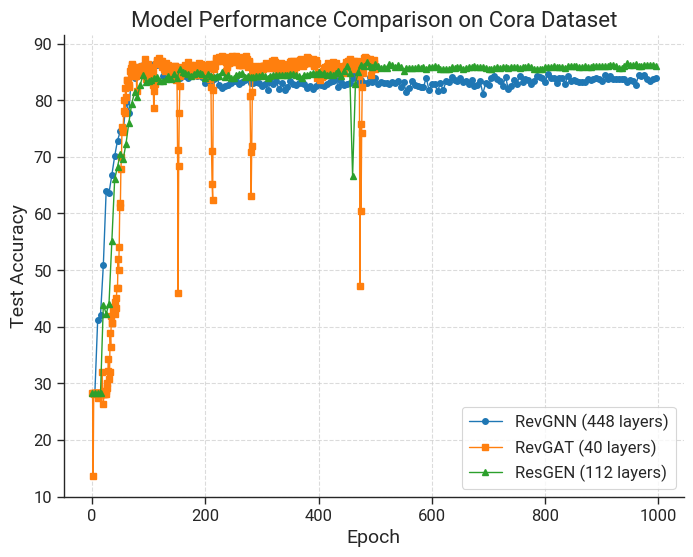

In [3]:
cmp = sns.color_palette("tab10")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

revgnn_test_acc = np.load('./exps/cora/448revgnn_4pp_1b_1mb_deberta-base_test_acc.npy')
revgat_test_acc = np.load('./exps/cora/40revgat_2pp_1b_1mb_deberta-base_test_acc.npy')
resgen_test_acc = np.load('./exps/cora/112resgen_4pp_1b_1mb_deberta-base_test_acc.npy')


x_revgnn = np.arange(len(revgnn_test_acc)) * 5  # Scale by 5 epochs
x_revgat = np.arange(len(revgat_test_acc)) * 1  # No scaling
x_resgen = np.arange(len(resgen_test_acc)) * 5  # Scale by 5 epochs

ax.plot(x_revgnn, revgnn_test_acc, label='RevGNN (448 layers)', 
        marker='o', color=cmp[0], linewidth=1, markersize=4)
ax.plot(x_revgat, revgat_test_acc, label='RevGAT (40 layers)', 
        marker='s', color=cmp[1], linewidth=1, markersize=4)
ax.plot(x_resgen, resgen_test_acc, label='ResGEN (112 layers)', 
        marker='^', color=cmp[2], linewidth=1, markersize=4)


# Customize plot
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Test Accuracy', fontsize=14)
ax.tick_params(labelsize=12)
ax.grid(linestyle='--', alpha=0.7)
ax.set_title('Model Performance Comparison on Cora Dataset', fontsize=16)

# axs.set_ylim(50, 75)
# axs.set_xlim(0, 1000)


# handles,labels=plt.gca().get_legend_handles_labels()
ax.legend(
            # loc='upper center', 
            #   bbox_to_anchor=(0.52,1.13), 
              fancybox=True, 
              fontsize=12)
sns.despine()

## Products

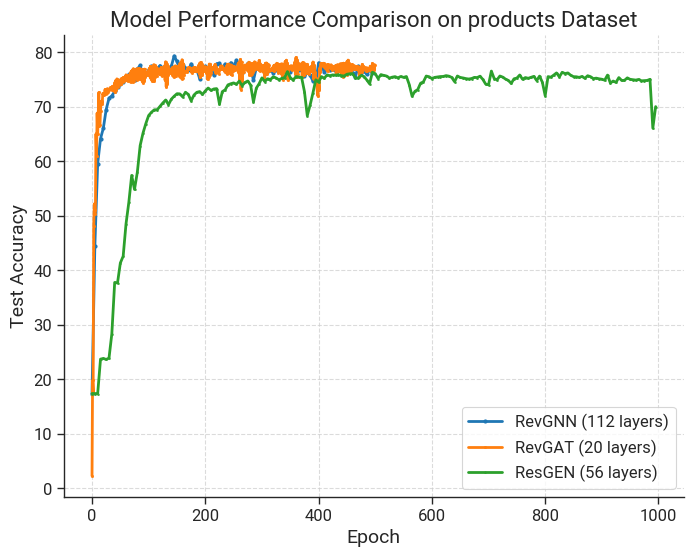

In [4]:
cmp = sns.color_palette("tab10")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

revgnn_test_acc = np.load('./exps/ogbn-products/112revgnn_4pp_1b_1mb_deberta-base_test_acc.npy')
revgat_test_acc = np.load('./exps/ogbn-products/20revgat_4pp_1b_1mb_deberta-base_test_acc.npy')
resgen_test_acc = np.load('./exps/ogbn-products/56resgen_4pp_1b_1mb_deberta-base_test_acc.npy')


x_revgnn = np.arange(len(revgnn_test_acc)) * 5  # Scale by 5 epochs
x_revgat = np.arange(len(revgat_test_acc)) * 1  # No scaling
x_resgen = np.arange(len(resgen_test_acc)) * 5  # Scale by 5 epochs

ax.plot(x_revgnn, revgnn_test_acc, label='RevGNN (112 layers)', 
        marker='o', color=cmp[0], linewidth=2, markersize=2)
ax.plot(x_revgat, revgat_test_acc, label='RevGAT (20 layers)', 
        marker='s', color=cmp[1], linewidth=2, markersize=1)
ax.plot(x_resgen, resgen_test_acc, label='ResGEN (56 layers)', 
        marker='^', color=cmp[2], linewidth=2, markersize=1)


# Customize plot
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Test Accuracy', fontsize=14)
ax.tick_params(labelsize=12)
ax.grid(linestyle='--', alpha=0.7)
ax.set_title('Model Performance Comparison on products Dataset', fontsize=16)

# axs.set_ylim(50, 75)
# ax.set_xlim(0, 500)


# handles,labels=plt.gca().get_legend_handles_labels()
ax.legend(
            # loc='upper center', 
            #   bbox_to_anchor=(0.52,1.13), 
              fancybox=True, 
              fontsize=12)
sns.despine()

In [ ]:
print(len(revgnn_test_acc), len(revgat_test_acc), len(resgen_test_acc))

In [ ]:
import torch
import dgl
from ogb.nodeproppred import DglNodePropPredDataset, NodePropPredDataset
import random

seed = 123
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

dataset_dir = "/home/mzhang/data/"
ogb_dataset = DglNodePropPredDataset(name="ogbn-arxiv", root=dataset_dir)
g, data_y = ogb_dataset[0]
data_y = torch.as_tensor(data_y).squeeze(1)
split_idx = ogb_dataset.get_idx_split()
data_x = torch.as_tensor(g.ndata["feat"])
num_classes = ogb_dataset.num_classes

each_chunk_idx = torch.arange(100)
chunk_g = dgl.node_subgraph(g, each_chunk_idx)
a = g.nodes()
b = chunk_g.ndata['_ID']
print(b)

In [ ]:
import torch

valid_indices = torch.tensor([1, 2, 0, 1, 1])
valid_labels = torch.tensor([1, 1, 2, 1, 1])
correct = torch.sum(valid_indices == valid_labels)
valid_indices == valid_labels

In [ ]:
import torch
LM_emb_path = f"./lm_workloads/prt_lm/ogbn-arxiv2/microsoft/deberta-base-seed0.emb"
if os.path.exists(LM_emb_path):
    print(f"LM_emb_path: {LM_emb_path}")
    features = torch.from_numpy(np.array(
            np.memmap(LM_emb_path, mode='r',
                    dtype=np.float16,
                    shape=(169340, 128)))
    ).to(torch.float32)
zero_rows = torch.count_nonzero(features[:, 0]).item()
zero_rows

In [ ]:
zero_rows = torch.count_nonzero(features[:, 0]).item()
zero_rows